In [ ]:
install.packages("ggplot2movies")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("maps")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("mapdata")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("sp")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("png")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# ȘD - Scop Laboratorul 5
Scopul laboratarului 5 de Știința Datelor este:

  - dezvoltarea capacității de a produce un grafic

In [ ]:
library("ggplot2")
library("ggplot2movies")
library("maps") 
library("dplyr")
library("tidyr")
library("lubridate")
library("mapdata")
library("sp")
library("RColorBrewer")
library("png")
set.seed(20) 


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




<b> Înainte să începeți laboratorul descărcați arhiva [ https://drive.google.com/file/d/184tF9KLd7F7izYDV8wT8Cri4czvtdR5G/view?usp=sharing ], dezarhivați,  și încărcați directorul data în colab (partea din stânga imaginea unui director, după ce ați creat directorul data). Va dura 15 minute aproximaitv. TUTORIAL : [ https://ctipub.sharepoint.com/sites/03-ACS-L-A4-S1ProiectareareelelorSeriaC1-2020/Shared%20Documents/Laborator/Recordings/Meeting%20now-20210111_202638-Meeting%20Recording.mp4?web=1 ] </b>


TLDR: Dacă nu există cheful de citit text lung treceți la exerciții. În mare
se discută despre grafice. Probabil să reveniți când lucrați la licența, dacă nu 
știți să utilizați de gnuplot și awk (Spoiler Alert: Nici în labul acesta nu se face).

# Analiza Datelor

Vom folosi pentru analiza setul de date europene legat de poluarea aerului în
România [ http://cdr.eionet.europa.eu/ro/eu/aqd/e1a] [https://www.eea.europa.eu/data-and-maps/data/aqereporting-8 ].
Am decis să folosim aceste date pentru că [ https://www.youtube.com/watch?v=Q69oWhgFp04 ] (Boomer joke). 
:sadface pentru cei ce se așteptau la o manea, măcar intro-ul melodiei nu mai sună
la fel de bine în ziua de azi. Revenind la datele noastre, avem date pe toți anii din
intervalul 2013-2019. De interes pentru noi o să fie coloanele "StartDate" (reprezintă 
momentul de început al intervalului peste care a fost făcută media valoriilor), "Value"
(Valoarea pentru poluantul respectiv în unitatea de măsură reprezentativă pentru acesta),
"ID" (Id-ul stației care a făcut măsurătoarea) și "PolluantCode" (Codul poluantului pe
care îl puteți găsi la următorul link [ http://dd.eionet.europa.eu/vocabulary/aq/pollutant ]).
Pentru început citim datele din 2013 și 2019.

In [ ]:
RoPollutionFilePath <- file.path("data", "poluare2019.csv")
RoPollutionData2019 <- read.csv(RoPollutionFilePath)
RoPollutionData2019$X <- NULL
colnames(RoPollutionData2019)[1] <- "StartDate"
colnames(RoPollutionData2019)[2] <- "EndDate"
colnames(RoPollutionData2019)[3] <- "Value"
colnames(RoPollutionData2019)[4] <- "Validity"
colnames(RoPollutionData2019)[5] <- "Verfication"
colnames(RoPollutionData2019)[6] <- "ID"
colnames(RoPollutionData2019)[7] <- "PolluantCode"
RoPollutionData2019$StartDate <- ymd_hms(RoPollutionData2019$StartDate)
RoPollutionData2019$ID <- factor(RoPollutionData2019$ID)
RoPollutionData2019$PolluantCode <- factor(RoPollutionData2019$PolluantCode)
RoPollutionData2019$Value <-as.numeric(RoPollutionData2019$Value)
head(RoPollutionData2019)

StartDate           EndDate             Value Validity Verfication
1 2018-12-31 22:00:00 2018-12-31 23:00:00 0.00  1        -1         
2 2018-12-31 23:00:00 2019-01-01 00:00:00 7.29  1         1         
3 2019-01-01 00:00:00 2019-01-01 01:00:00 6.90  1         1         
4 2019-01-01 01:00:00 2019-01-01 02:00:00 7.02  1         1         
5 2019-01-01 02:00:00 2019-01-01 03:00:00 7.08  1         1         
6 2019-01-01 03:00:00 2019-01-01 04:00:00 6.93  1         1         
  ID                PolluantCode
1 RO0066A_00001_100 1           
2 RO0066A_00001_100 1           
3 RO0066A_00001_100 1           
4 RO0066A_00001_100 1           
5 RO0066A_00001_100 1           
6 RO0066A_00001_100 1

In [ ]:
RoPollutionFilePath <- file.path("data", "poluare2013.csv")
RoPollutionData2013 <- read.csv(RoPollutionFilePath)
RoPollutionData2013$X <- NULL
colnames(RoPollutionData2013)[1] <- "StartDate"
colnames(RoPollutionData2013)[2] <- "EndDate"
colnames(RoPollutionData2013)[3] <- "Value"
colnames(RoPollutionData2013)[4] <- "Validity"
colnames(RoPollutionData2013)[5] <- "Verfication"
colnames(RoPollutionData2013)[6] <- "ID"
colnames(RoPollutionData2013)[7] <- "PolluantCode"
RoPollutionData2013$StartDate <- ymd_hms(RoPollutionData2013$StartDate)
RoPollutionData2013$ID <- factor(RoPollutionData2013$ID)
RoPollutionData2013$PolluantCode <- factor(RoPollutionData2013$PolluantCode)
RoPollutionData2013$Value <-as.numeric(RoPollutionData2013$Value)
head(RoPollutionData2013)

StartDate           EndDate             Value Validity Verfication
1 2012-12-31 22:00:00 2012-12-31 23:00:00 9.29  1        1          
2 2012-12-31 23:00:00 2013-01-01 00:00:00 9.20  1        1          
3 2013-01-01 00:00:00 2013-01-01 01:00:00 9.68  1        1          
4 2013-01-01 01:00:00 2013-01-01 02:00:00 9.42  1        1          
5 2013-01-01 02:00:00 2013-01-01 03:00:00 9.77  1        1          
6 2013-01-01 03:00:00 2013-01-01 04:00:00 9.76  1        1          
  ID                                        PolluantCode
1 RO.ANPM.AQ-OBP-RO0008R_00001_100_100_2013 1           
2 RO.ANPM.AQ-OBP-RO0008R_00001_100_100_2013 1           
3 RO.ANPM.AQ-OBP-RO0008R_00001_100_100_2013 1           
4 RO.ANPM.AQ-OBP-RO0008R_00001_100_100_2013 1           
5 RO.ANPM.AQ-OBP-RO0008R_00001_100_100_2013 1           
6 RO.ANPM.AQ-OBP-RO0008R_00001_100_100_2013 1

## Grafice de analiză

Scopul acestui colos textual este de a vă oferi niște idei despre formarea
unui grafic de analiză. Graficele de analiză sunt cele pe care le prezentați după
analiza datelor pentru a arăta rezultatul muncii voastre. În cadrul licenței li
se mai spun și "chestiile alea pe care se uită membrii comisiei ca să zică
că fac ceva". Unele dintre ele apar în prezentarea pe care o țineți, #copypaste.

### Principiul 1 : Comparație/Ipoteză

Primul principiu maschează expresia "o imagine 1000 de cuvinte". El vrea să spună
că ar trebui să se înțeleagă din grafic ipoteza tezei voastre ("Eu vă prezint proiectul
X care este mai bun ca Y sau face mai bine Z din punctul de vedere W"). În general ipotezele
sunt legate de o comparație. Compari ipoteză propusă de tine cu o ipoteză existentă.
Cele mai evidente greșeli sunt cele în care se "toarnă" date care formează o 
linie ce se "ridică". Exemple din perle licență:

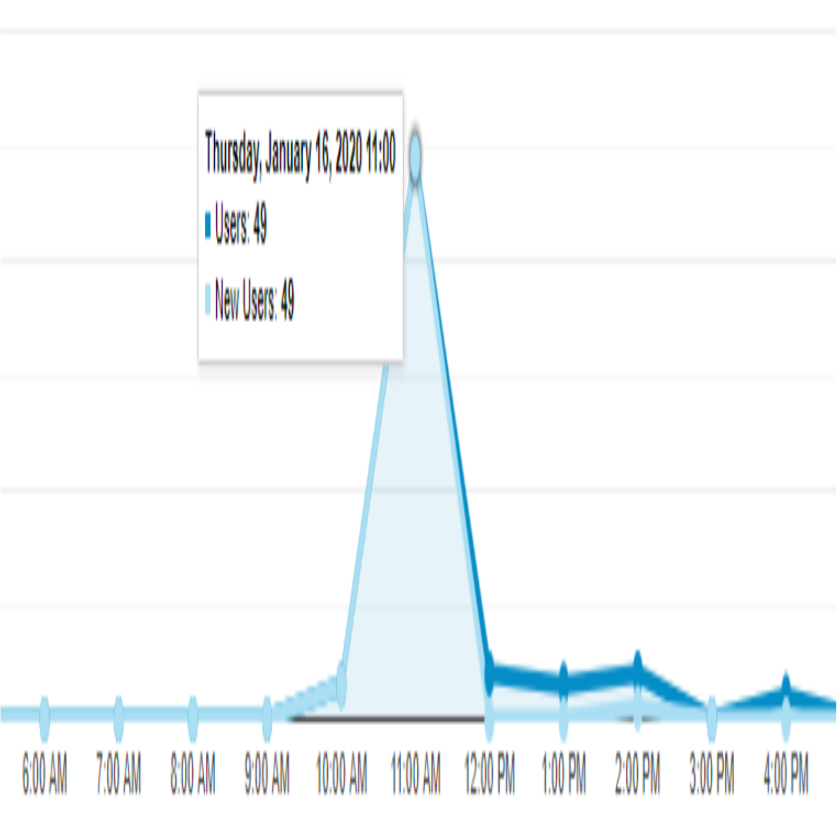

In [ ]:
perlaFilePath <- file.path("data", "perla1.png")
img <- readPNG(perlaFilePath)
par(mar=c(0,0,0,0), xpd=NA, mgp=c(0,0,0), oma=c(0,0,0,0), ann=F)
plot.new()
plot.window(0:1, 0:1)
usr<-par("usr")    
rasterImage(img, usr[1], usr[3], usr[2], usr[4])

Acest exemplu e "bun" deoarece linia "coboară" după ce se "ridică", aproape că vrea
să transmită un mesaj. Acesta poate fi un grafic bun pentru explorare, dar în
cazul analizei nu oferă nimic. E cumva specială data și ora de 16 ianurie 2020 11:00
(ultimul test de curs la pr)? Are vreo importanță diferența dintre utilizatori
și utilizatori noi. Pe datele noastre echivalentul ar fi să afișăm distribuția
poluantului dioxid de sulf în anul 2019.

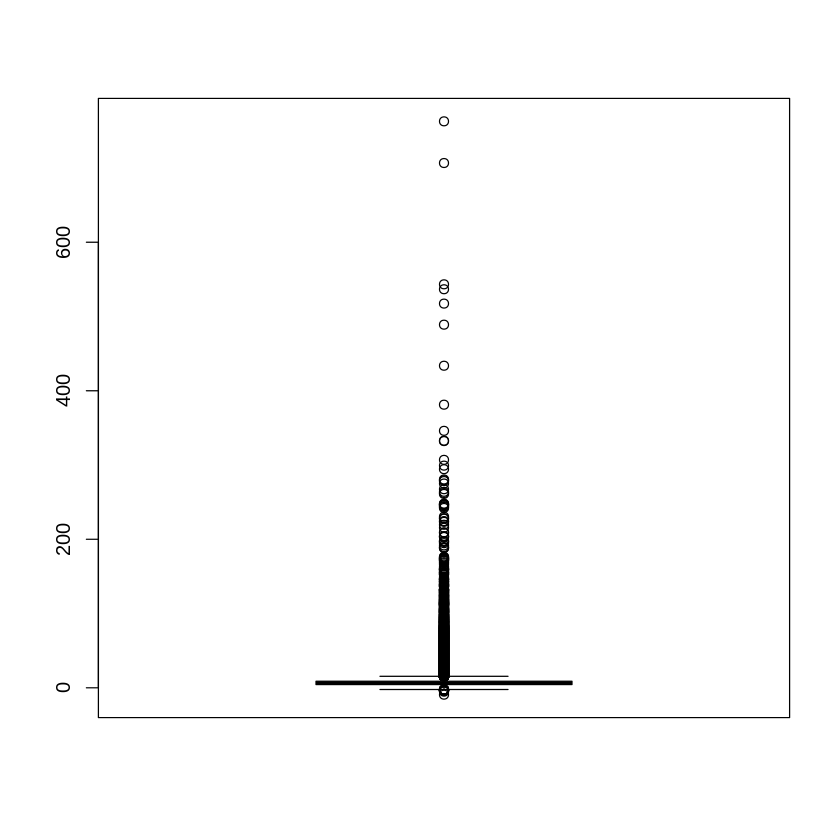

In [ ]:
RoData2019_SO_2<- RoPollutionData2019 %>% filter(PolluantCode==1)
boxplot(RoData2019_SO_2$Value)

Putem spune că avem un grafic cu un mesaj  "evident" și "puternic", dar 
fără să ne ofere vreun detaliu de analiză asupra datelor. Nu aveam cum să transmitem
un mesaj atât timp cât nu avem o ipoteză. La următorul link [ https://ec.europa.eu/environment/air/quality/standards.htm ]
găsim limitele recomandate de unuiunea europeană. Putem alege ipoteza "România respectă
limitele recomandate pentru poluantul dioxid de sulf". Vom compara în graficul nostru
cu valaorea limitei dioxidului de sulf. O altă problemă este reprezentată de faptul
că punctele sunt concentrate și nu sunt vizibile. Pentru a rezolva această problemă
se scalarea unei axe. O metodă este de a trece în bază logaritmică pe o axă.

Warning message in log(RoData2019_SO_2$Value):
“NaNs produced”
Warning message in bplt(at[i], wid = width[i], stats = z$stats[, i], out = z$out[z$group == :
“Outlier (-Inf) in boxplot 1 is not drawn”


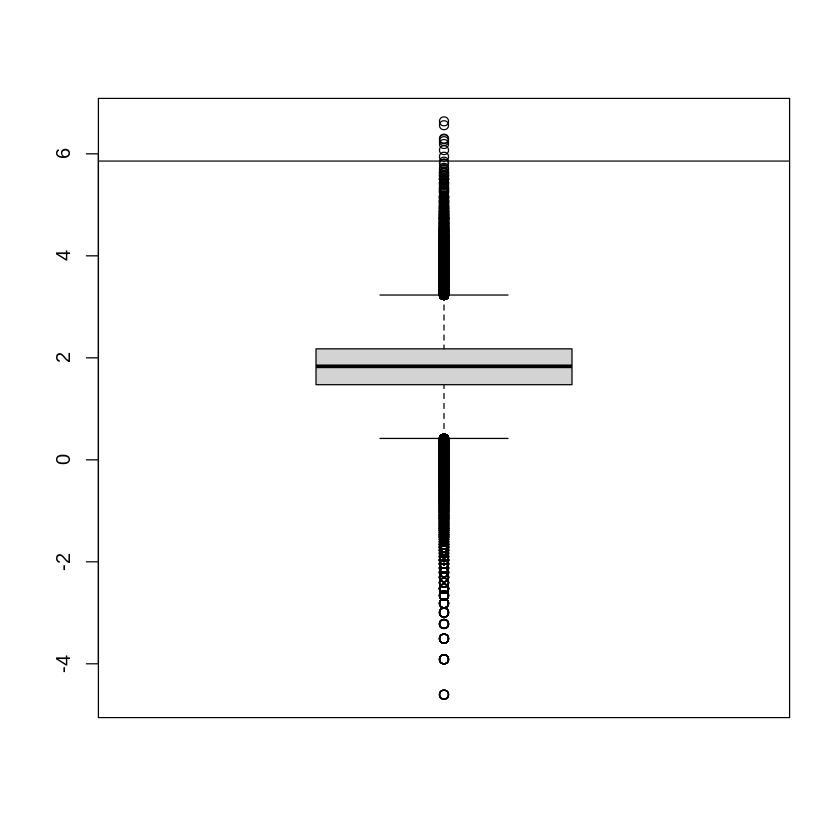

In [ ]:
boxplot(log(RoData2019_SO_2$Value))
abline(h = log(350))

Avem valori ce depășesc limita, dar standardul spune că nu trebuie să avem mai
mult de 24.

In [ ]:
sum(RoData2019_SO_2$Value > 350)

[1] 8

Noi avem doar 8, deci respectăm recomandările uniunii europene. Totuși această
ipoteză e "prea simplă" pentru noi. Se știe că există diferențe între valorile
poluanților între anotimpuri. Vom testa această ipoteză pe două anotimpuri:
vara și iarna.

Warning message in log(RoData2019_SO_2_vara$Value):
“NaNs produced”
Warning message in log(RoData2019_SO_2_iarna$Value):
“NaNs produced”
Warning message in bplt(at[i], wid = width[i], stats = z$stats[, i], out = z$out[z$group == :
“Outlier (-Inf) in boxplot 1 is not drawn”
Warning message in bplt(at[i], wid = width[i], stats = z$stats[, i], out = z$out[z$group == :
“Outlier (-Inf) in boxplot 2 is not drawn”


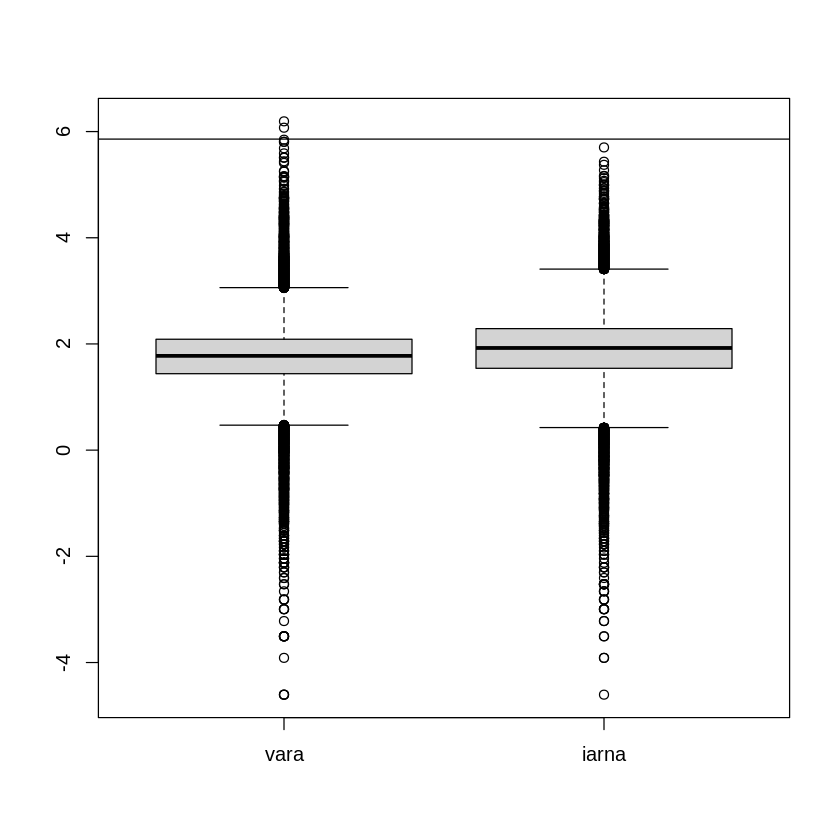

In [ ]:
RoData2019_SO_2_vara <- RoData2019_SO_2 %>% filter(month(StartDate)>5 & month(StartDate) < 9)
RoData2019_SO_2_iarna <- RoData2019_SO_2 %>% filter(month(StartDate)>11 | month(StartDate) < 3)
boxplot(log(RoData2019_SO_2_vara$Value), log(RoData2019_SO_2_iarna$Value), names=c("vara", "iarna") )
abline(h = log(350))

Acum prin aceastâ comparație oferim mai multe informații despre datele noastre.
Se transmite nivelul de dioxid de sulf este mai ridicat iarna decât vara (sunt diferențe
în bază logaritmică). Limita nu a fost depășită iarna, dar a fost depășită vara. Ce vrem
să transmitem: un grafic care are multe comparații în el
are o poveste mai lungă și poate ajunge la cele "1000 de cuvinte". Mai departe
trecem la al doilea principiu.

### Principiul 2: Cauzalitate, Mecanicism, Explicație, Structură

Al doilea principiu se traduce prin "demonstrează ipoteza ta prin grafic". Pentru
fiecare în parte:
  - Cauzalitate - Cauzalitatea apare când împarți "mulțimea" ta în "grupuri"
pentru care ai folosit "tratamente" diferite. Un exemplu simplu din știința calculatoarelor
este cel de a introduce un protocol nou sau un algoritm nou pentru o problemă pentru care
mai există soluții. Principiul 2 spune în acest caz să rulezi toți algoritmi pe același set
de date și să afișezi rezultate în același grafic în funcție de o caracteristică pe care
o consideri de importanță. Cum marele "ideal" al unui dascăl este să râdă de perlele
studenților mai aducem una în discuția publicului:

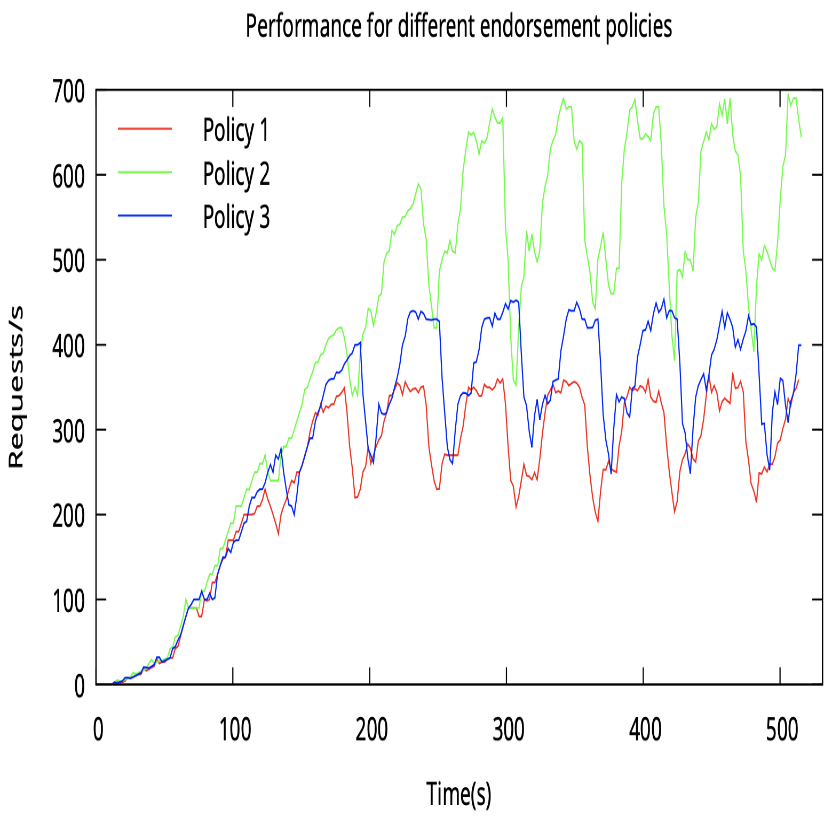

In [ ]:
perlaFilePath <- file.path("data", "perla2.png")
img <- readPNG(perlaFilePath)
par(mar=c(0,0,0,0), xpd=NA, mgp=c(0,0,0), oma=c(0,0,0,0), ann=F)
plot.new()
plot.window(0:1, 0:1)
usr<-par("usr")    
rasterImage(img, usr[1], usr[3], usr[2], usr[4])

La o primă vedere totul pare înregulă, mai puțin culorile (:sadcolorblind, #protv).
Avem 3 politici distincte care se comportă diferit. Problema este că nu știm
care sunt aceste politici, cu ce diferă ? Ce reprezintă acel "1", "2", "3" ? Sunt
niște soluții cunoscute deja ? Sunt toate 3 niște propuneri ? Dacă sunt propuneri
cu ce diferă ? Dacă sunt poropuneri ar trebui să avem o altă soluție cunoscută
în domeniu.

Pentru datele folosite în laborator ar trebui să găsim un an în care a fost dată o 
lege pentru reducerea poluării și să vedem dacă aceasta a avut efect în 2 ani consecutivi
cel dinaintea implementări și primul an al implementări (putem merge către 3 ani
considerând primii 2 ani de implementare).
Din păcate, autorul e leneș așa că vom compara 2013 cu 2019. 

Warning message in log(RoData2013_SO_2$Value):
“NaNs produced”
Warning message in log(RoData2019_SO_2$Value):
“NaNs produced”
Warning message in bplt(at[i], wid = width[i], stats = z$stats[, i], out = z$out[z$group == :
“Outlier (-Inf) in boxplot 1 is not drawn”
Warning message in bplt(at[i], wid = width[i], stats = z$stats[, i], out = z$out[z$group == :
“Outlier (-Inf) in boxplot 2 is not drawn”


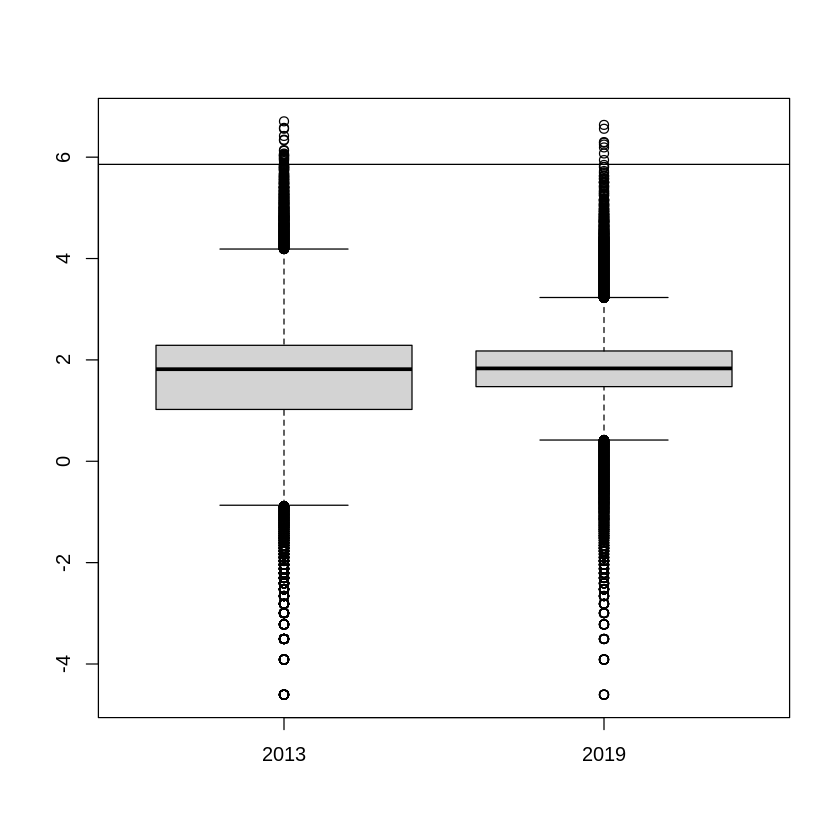

In [ ]:
RoData2013_SO_2<- RoPollutionData2013 %>% filter(PolluantCode==1)
boxplot(log(RoData2013_SO_2$Value), log(RoData2019_SO_2$Value), names=c("2013", "2019") )
abline(h = log(350))

Uitându-ne la grafic putem spune "Dacă nu am avut o problemă ce să rezolvăm".
Se poate spune de dragul discuției că au mai scăzut valoriile și sunt mai
concentrate, dar să fim serioși dacii frumoși și liberi nu au fost ei mari
crescători de bovine. Opera "Moara cu Noroc" are un porcar, nu un "cowboy". 
Totuși să încercăm poluantul $PM_{2.5}$, că acolo cam toată Europa a scăzut.

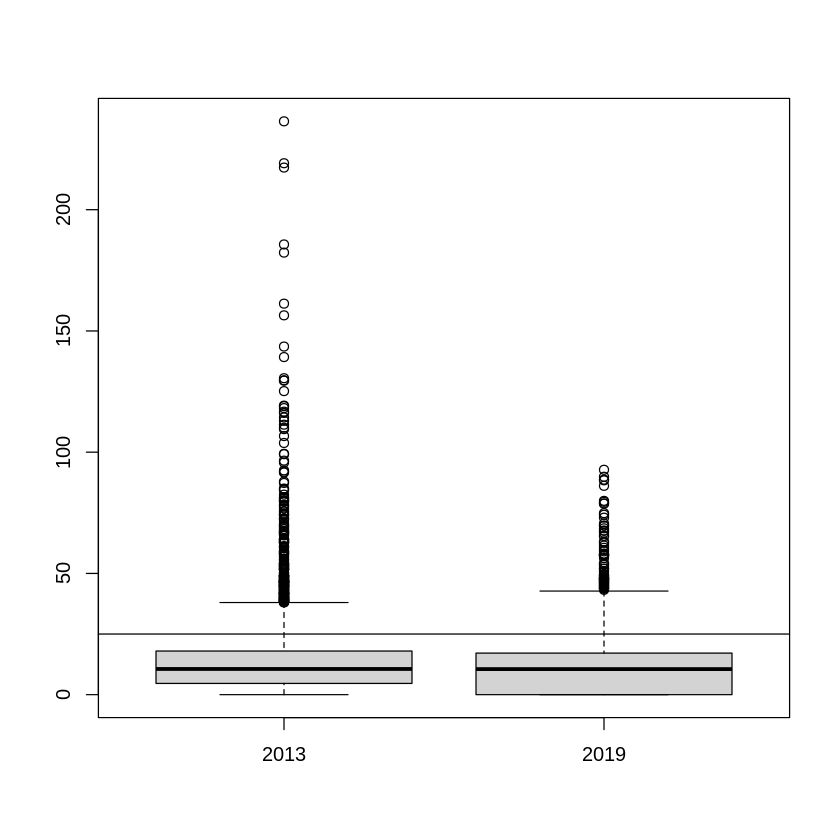

In [ ]:
RoData2013_PM_2_5<- RoPollutionData2013 %>% filter(PolluantCode=="6001")
RoData2019_PM_2_5<- RoPollutionData2019 %>% filter(PolluantCode=="6001")
boxplot(RoData2013_PM_2_5$Value, RoData2019_PM_2_5$Value, names=c("2013", "2019") )
abline(h = 25)

O difernță "vizibilă", pe care o putem afișa pe parcursul unui întregului an.
Politica Românei și a Uniunii Europene de a elimina senzorii care
ofereau valori "răutăcioase" este un adevărat succes.

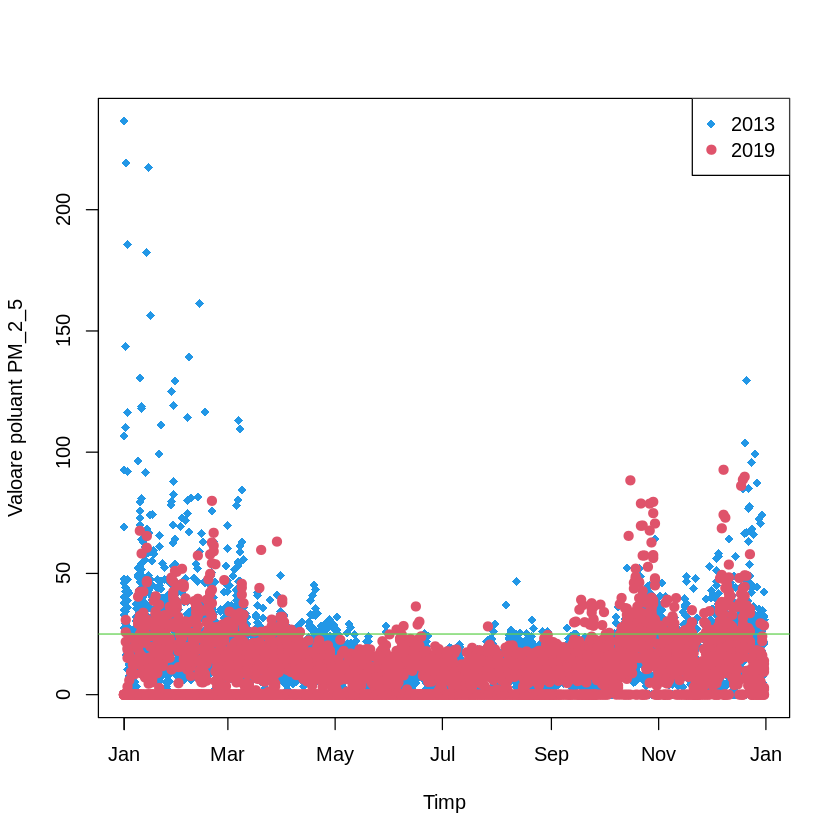

In [ ]:
plot(RoData2013_PM_2_5$StartDate, RoData2013_PM_2_5$Value,  type= "n" , xlab = "Timp", ylab = "Valoare poluant PM_2_5")
points(RoData2013_PM_2_5$StartDate, RoData2013_PM_2_5$Value, pch=18, col=4 )
points(RoData2019_PM_2_5$StartDate - years(6), RoData2019_PM_2_5$Value, pch=19, col=2)
abline(h = 25, col = 3)
legend("topright" ,legend=c("2013", "2019"), col=c(4, 2), pch = c(18,19))

  - Mecanicism. Mecanicismul apare atunci când implmentezi o muncă teoretică, care
încă nu are o implmentare perfectă sau nu e posibil să aibă. Un exemplu din știința
calculatoarelor este reprezentat de protocoalele de rețele precum wi-fi care oferă
anumite viteze teoretice maxime. Noi putem veni cu o implementare a standardului și
vom arăta în grafic rezultatele noastre (mbps) față de valoriile teoretice.
Se mai recomandă afișarea rezultatelor unei simulări (ex: ns3).
Astfel, putem vedea cât de mult se aproprie implementarea noastră de formula teoretică.
Un alt exemplu din munca renumiților studenți ai acestei facultăți:

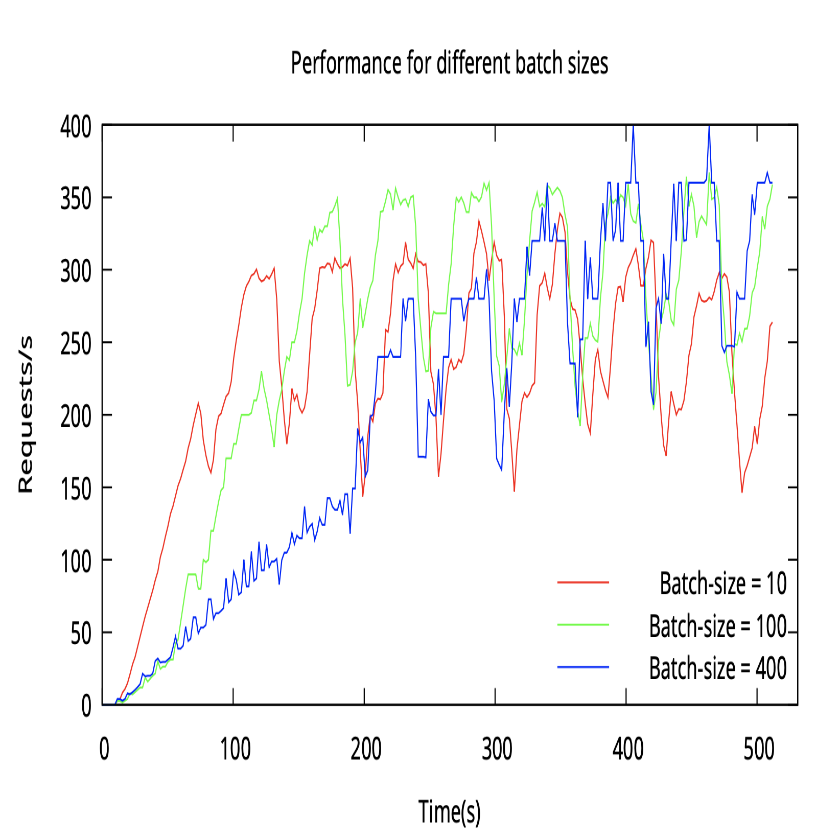

In [ ]:
perlaFilePath <- file.path("data", "perla3.png")
img <- readPNG(perlaFilePath)
par(mar=c(0,0,0,0), xpd=NA, mgp=c(0,0,0), oma=c(0,0,0,0), ann=F)
plot.new()
plot.window(0:1, 0:1)
usr<-par("usr")    
rasterImage(img, usr[1], usr[3], usr[2], usr[4])

Acest principiul poate fi folosit și când încercăm diferite implementări ce
diferă printr-un parametru ca în cazul de mai sus. Însă, este necesar să oferim
în grafic rezultatul pe care ni-l dorim sau o presupunere teoretică a unei
soluții perfecte. În cazul de față, nu avem cum să ne dăm seama care este soluția
mai bună. Ce ne dorim ? Mai multe requesturi pe secundă pe termen scurt sau lung ? 
sau ne dorim un număr constant ? Cu toate astea este un grafic bun care transmite
faptul că un batch-size mai mare ne oferă un număr mai mare de request pe secundă
pe termen lung. De asemenea se pare că avem o plafonare pentru un size mai 
mare de 100 pe termen lung.

Revenind la datele noastre, pentru $PM_{2.5}$ ar trebui să calculăm cât poluează
mașinile înmatriculate în România și astfel să descoperim județul cu cele mai
multe mașini înmatriculate "pe" Bulgaria (<3 Vâlacea). Sau putem vedea ce județ
are cele mai multe permise de conducere per mașină înamtriculată (<3 Suceava, :( Argeș).

  - Explicația. Adeseori explicația pentru rezultatele noastre nu este atât
de apropiată de date sau știută/controlată dinainte ca în cazurile precedente. 
Aici va trebui să "săpăm". Revenim cu un grafic din categoria "Să fie să ocupe
loc":

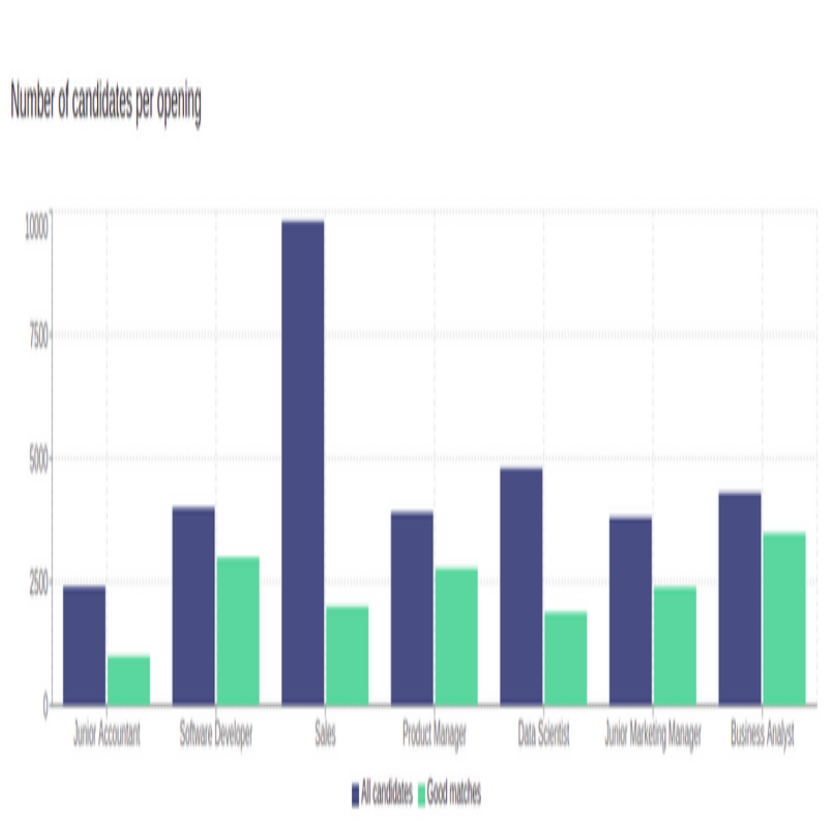

In [ ]:
perlaFilePath <- file.path("data", "perla4.png")
img <- readPNG(perlaFilePath)
par(mar=c(0,0,0,0), xpd=NA, mgp=c(0,0,0), oma=c(0,0,0,0), ann=F)
plot.new()
plot.window(0:1, 0:1)
usr<-par("usr")    
rasterImage(img, usr[1], usr[3], usr[2], usr[4])

Pare un grafic "frumos", dar "cam atât". Acest grafic oferă date fără a oferi
explicații, ceea ce ridică mai multe întrebări decât informații.
Pentru ce candidează (ce reprezintă opening) ? De ce anumite categorii au un
"match" mai bun ? Câte persoane sunt în acele categorii ? Câte persoane din 
categoria respectivă nu au candidat ? O parte din întrebări ar primi un răspuns 
dacă am folosi procente. Un grafic care ridică atât de multe întrebări fără a 
avea o eplicație măcar textuală ocupă spațiu degeaba.

Revenind la datele noastre, putem viziona încă o dată diferențele de dioxid
de sulf între anotimpuri.

Warning message in log(RoData2019_SO_2_vara$Value):
“NaNs produced”
Warning message in log(RoData2019_SO_2_iarna$Value):
“NaNs produced”
Warning message in bplt(at[i], wid = width[i], stats = z$stats[, i], out = z$out[z$group == :
“Outlier (-Inf) in boxplot 1 is not drawn”
Warning message in bplt(at[i], wid = width[i], stats = z$stats[, i], out = z$out[z$group == :
“Outlier (-Inf) in boxplot 2 is not drawn”


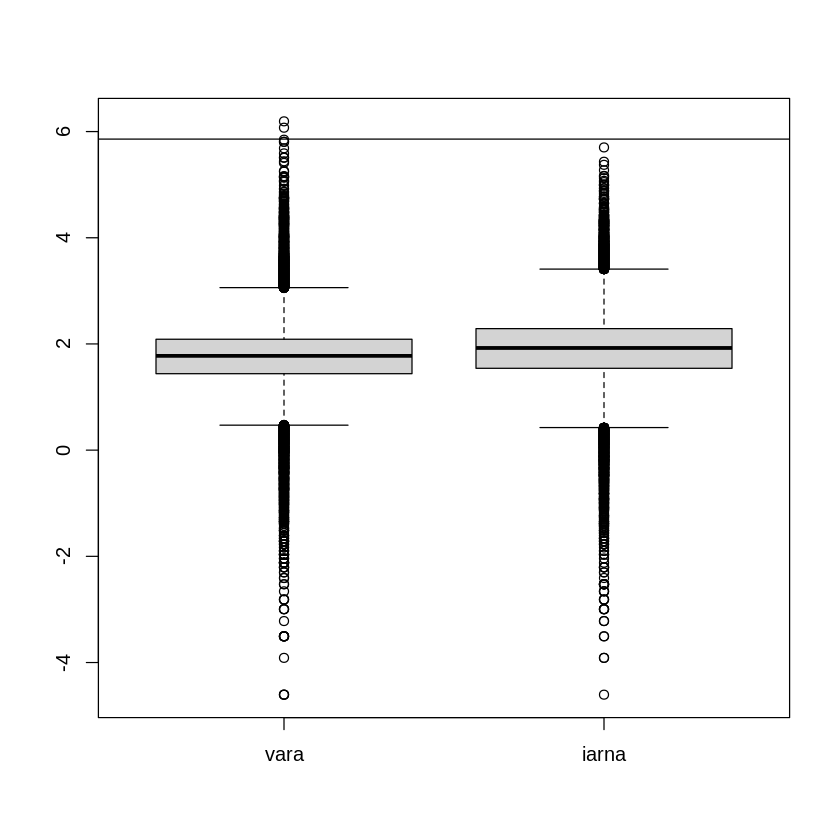

In [ ]:
RoData2019_SO_2_vara <- RoData2019_SO_2 %>% filter(month(StartDate)>5 & month(StartDate) < 9)
RoData2019_SO_2_iarna <- RoData2019_SO_2 %>% filter(month(StartDate)>11 | month(StartDate) < 3)
boxplot(log(RoData2019_SO_2_vara$Value), log(RoData2019_SO_2_iarna$Value), names=c("vara", "iarna") )
abline(h = log(350))

Centralele termice reprezintă unul din poluatori prinicipali de dioxid de sulf.
Cum iarna este mai frig centralele termice funcționează la o capacitate mai mare
deci poluează mai mult și asta explică diferența dinte cele două anotimpuri.
Desigur graficul de mai sus este incomplet, acesta necesită și adăugarea
boxplot-rilor pentru temperaturi în perioada respectivă, dar, din păcate,
autorul a jucat Dota 2.

  - Structura - Conceptul de structură e cel mai detaliat și complex dintre
cele prezentate până acum. Pe scurt este "Să ai datele structurate după variabile
alături de legăturile dintre ele". Asta înseamnă că ai cunoștințe profunde în domeniul
respectiv pentru a putea face legătura între diferite variabile și tabele. În
principiu se știe cât de mult influențează o variabilă altă variabilă. Un alt
exemplu din plaiurile calculatoristice:

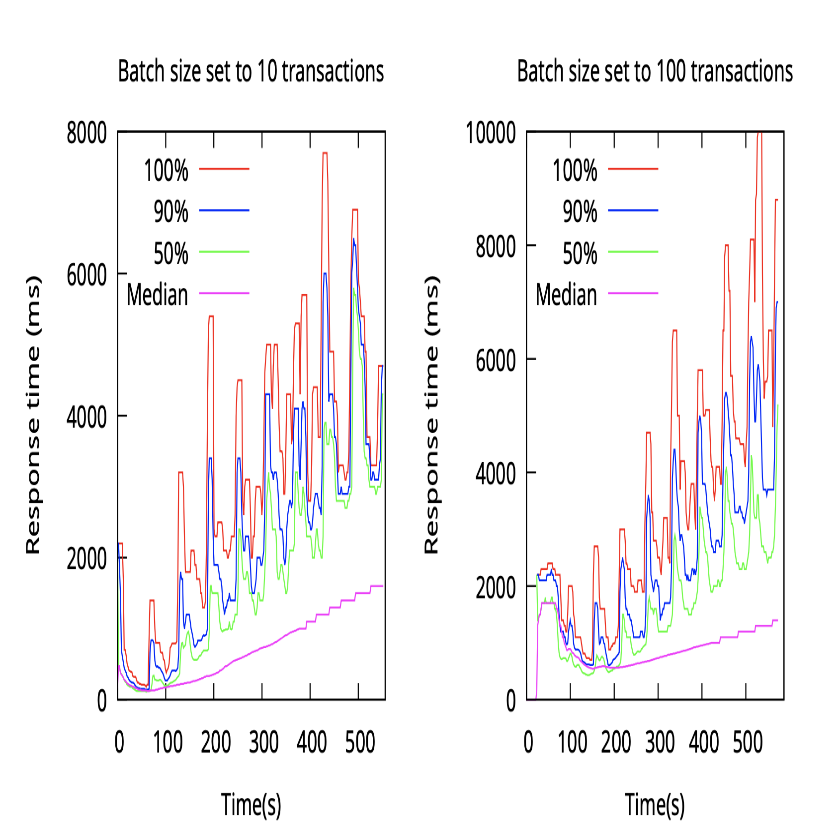

In [ ]:
perlaFilePath <- file.path("data", "perla5.png")
img <- readPNG(perlaFilePath)
par(mar=c(0,0,0,0), xpd=NA, mgp=c(0,0,0), oma=c(0,0,0,0), ann=F)
plot.new()
plot.window(0:1, 0:1)
usr<-par("usr")    
rasterImage(img, usr[1], usr[3], usr[2], usr[4])

Creatorul acestui grafic cunoaște că batch size-ul influențează timpul de răspuns
și structurează separat aceste 2 grafice pentru a vedea influența sa statistică
asupra timpului de răspuns. Din păcate, nici până în ziua de azi autorul nu știe ce
înseamnă linia verde și de ce e diferită de mediană sau cum a răspuns creatorul:
"Când l-am făcut știam eu și Dumnezeu. Acum doar Dumnezeu mai știe". Din păcate
nu avem un mod sigur de comunicare cu El și nici unul din membrii comisiei în urma
sacrificării nu are speranțe să ajungă prea aproape de El.

Revenind la datele noastre, autorul nu are cunoștințe despre poluanți. Cea mai
simplă influență este cea dintre $PM_{2.5}$ și $PM_{10}$ .

După parcurgerea principiului 2 cred că cititorul este destul de aproape de
ghicerea celui de al treilea, mai ales prin faptul că este pe linia de sub
această propoziție.

### Principiul 3: Multitudine de variabile

Al treilea principiu spune "lumea reală este compusă din mai mult de 2 
variabile". Ideea este să reprezentăm cât mai multe varaibile într-un
singur grafic (deoarece fiecare variabilă aduce informație) fără însă
a ridica prea multe întrebări la care acesta să nu răspundă. Într-un mod
ciudat acest principiu se "simte", dar se execută într-un mod "deosebit".
Urmează un astfel de exemplu:

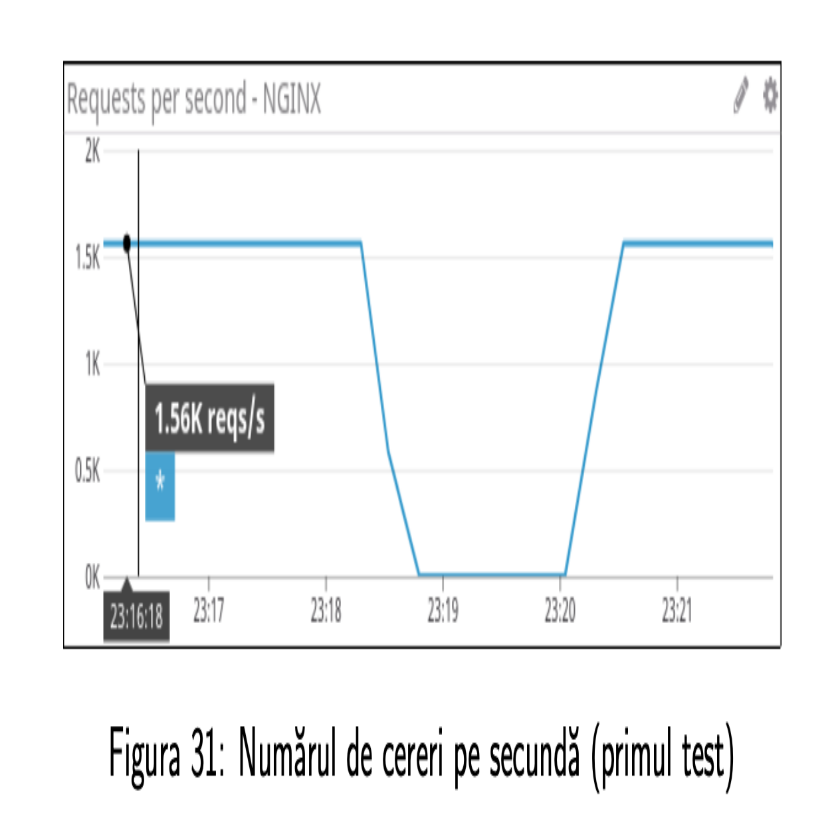

In [ ]:
perlaFilePath <- file.path("data", "perla6.png")
img <- readPNG(perlaFilePath)
par(mar=c(0,0,0,0), xpd=NA, mgp=c(0,0,0), oma=c(0,0,0,0), ann=F)
plot.new()
plot.window(0:1, 0:1)
usr<-par("usr")    
rasterImage(img, usr[1], usr[3], usr[2], usr[4])

S-a "simțit" că numărul testului este o variabilă, dar s-a decis să se facă câte
un grafic pentru fiecare test, deoarece toată lumea știe că un album foto este
mult mai bun decât o singură poză. Un grafic face cât 1000 de cuvinte, dar 10 grafice
fac cât o carte. Ideea este să nu ne fie frică să punem cât mai multe variabile
într-un singur grafic, mai ales când este necesar ca în cazul de față.

Revenind la datele noastre, am dori să vedem pe fiecare lună pentru fiecare
senzor valoriile poluantului $PM_{2.5}$.

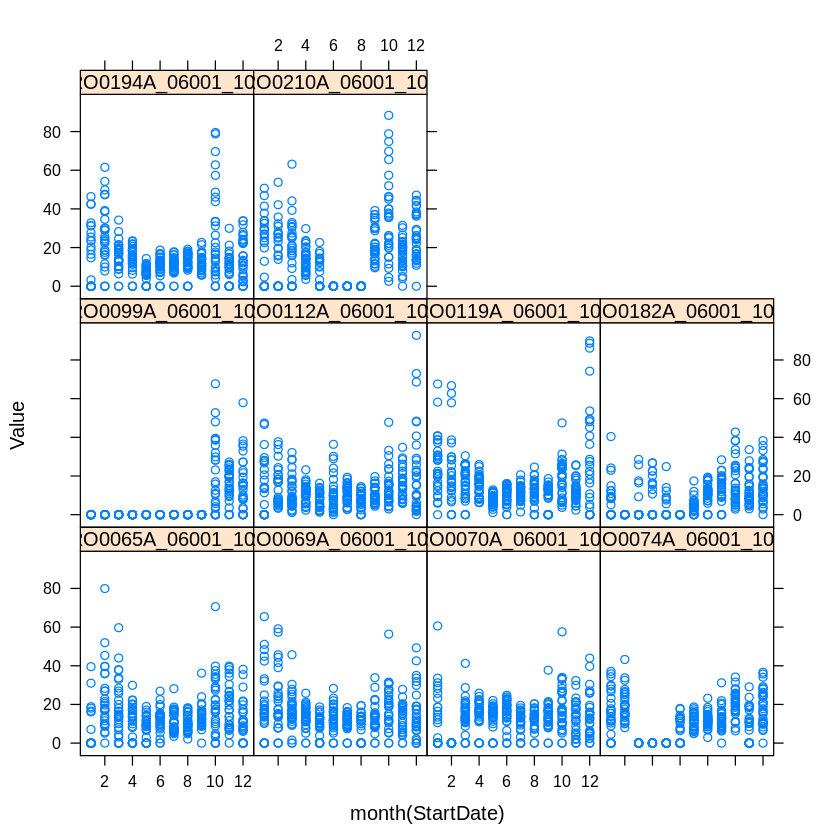

In [ ]:
library("lattice")
xyplot(data = RoData2019_PM_2_5, Value ~ month(StartDate) | ID)

Prin acest grafic complex putem vedea luna și zona în care avem valori ridicate
de poluare.

### Principiul 4: Dovezi

Al patrulea principiu e ceva de genul "Bă, tu mă minți ? Da' ce-am făcut șefu'?".
În prinicipal se referă la modul cum ai colectat datele și cum ai făcut experimentul
(dacă este un proces ștințific valid(.)  Aceast lucru se rezolvă textual cel mai des,
dar pot exista cazuri în care poți evidenția acest lucru prin grafice. De exemplu
în cazul nostu putem arăta că avem un senzor în fiecare județ.

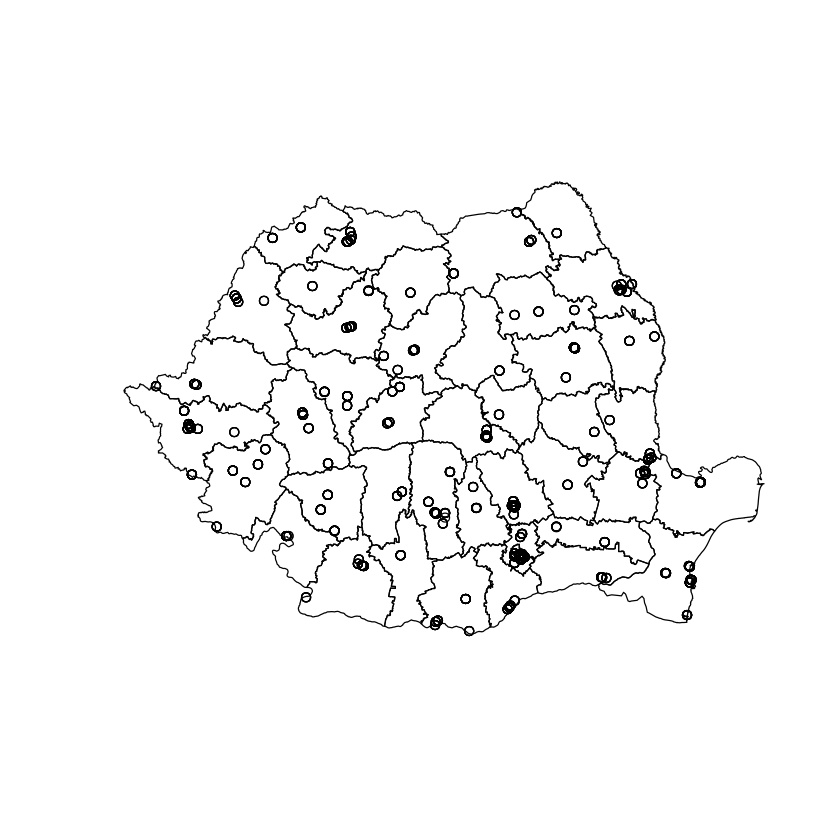

In [ ]:
roMetadataFilePath <- file.path("data", "rometadata.csv")
roMetadata <- read.csv(roMetadataFilePath, header = TRUE)

# https://keithnewman.co.uk/r/maps-in-r-using-gadm.html
# https://gadm.org/download_country_v3.html
# https://biogeo.ucdavis.edu/data/gadm3.6/Rsp/gadm36_ROU_1_sp.rds
RoMapFilePath <- file.path("data", "gadm36_ROU_1_sp.rds")
RoMap <- readRDS(RoMapFilePath)
plot(RoMap)
points(roMetadata$Longitude, roMetadata$Latitude)

În anumite cazuri din știința calculatoarelor se referă la prezentarea eroriilor
de măsurare sau zonei de încredere. În cazul cauzalității trebuie să arătăm că
există diferențe statistice semnificative între grupuriile noastre de tratament
prin teste statistice.

Aici greșelile sunt destul de evidente pe ideea "Am făcut și eu un test șefule",
"le-am copiat și eu după net", "așa le-am găsit ce să fac", "erau undeva pe google,
am uitat, important e că le am", greșeala pe care am făcut-o și eu mai sus "Nu vezi
că  e mai sus boxplotul acela" (chiar dacă uneori diferența este evidentă din boxplot
este necesar să facem testele statistice). Uneori pot exista răspunsuri
complexe precum acest video [ https://www.youtube.com/watch?v=CAyWN9ba9J8 ].

### Principiul 5: Descriere și documentare

Al cincilea principiu se referă la titlul, axele și legenda graficului. Este
important să avem numele axelor detaliat cu unitățiile de măsură. Titlul trebuie
să reprezinte ipoteza pe care vrem să o demonstrăm cu ajutorul graficului. În
caz de avem mai multe grupuri de date separate prin culori sau semne diferite
este necesar să avem o legendă (nu cu harap-alb, :boomer_joke).

### Principiul 6: Conținutul

Al șaselea principiu pe "scurt": "explică ce se află prin grafic pentru cei ce nu
îl înțeleg din prima , ca a doua oară să îl înțeleagă când îl văd" sau 
"explică măcar ce ai vrut să faci în grafic". În general se cam scrie ceea ce
ție ți se pare evident din grafic. Greșeala aici este să nu scri. 

Revenind la datele noastre, ar trebui să explicăm că există o diferență statistică
pentru dioxid de sulf între iarna și vară și că se datorează centralelor termice.
De asemenea, am putea vorbi despre evoluția României în intervalul de timp 2013-2019.

Conținutul este cel mai important, deoarece poate întipări graficul în memoria
cititorului.

### P.S.

Exemplele de mai sus nu vor să ia în derâdere munca creatoriilor lor. Vina este
a administrației facultății și coordonatoriilor care nu oferă o pregătire necesară
unei lucrări ștințifice, dar cere una. Acest lucru duce la o calitate scăzută a 
lucrăriilor de licență, dar de ce să ne pese "studentul trece bănuțul vine la băiatu'".

## Grafice de explorare

Graficiele de explorare sunt pentru înțelegerea datelor de către cel 
ce vrea să analizeze datele. Acestea sunt utilizate pentru:
  - înțelegerea unor proprietăți a datelor
  - găsirea unor structuri a datelor
  - sugerarea de modele de analiză
  - descoperirea unor erori de analiză

Caracteristici specificie:
  - sunt făcute rapid
  - sunt făcute în număr mare
  - obiectivul lor este înțelegerea personală
  - nu necesită prea multe detalii și respectarea principiilor unor grafice de analiză
  - nu le sunt necesare datelieri pentru o înțelegere mai bună

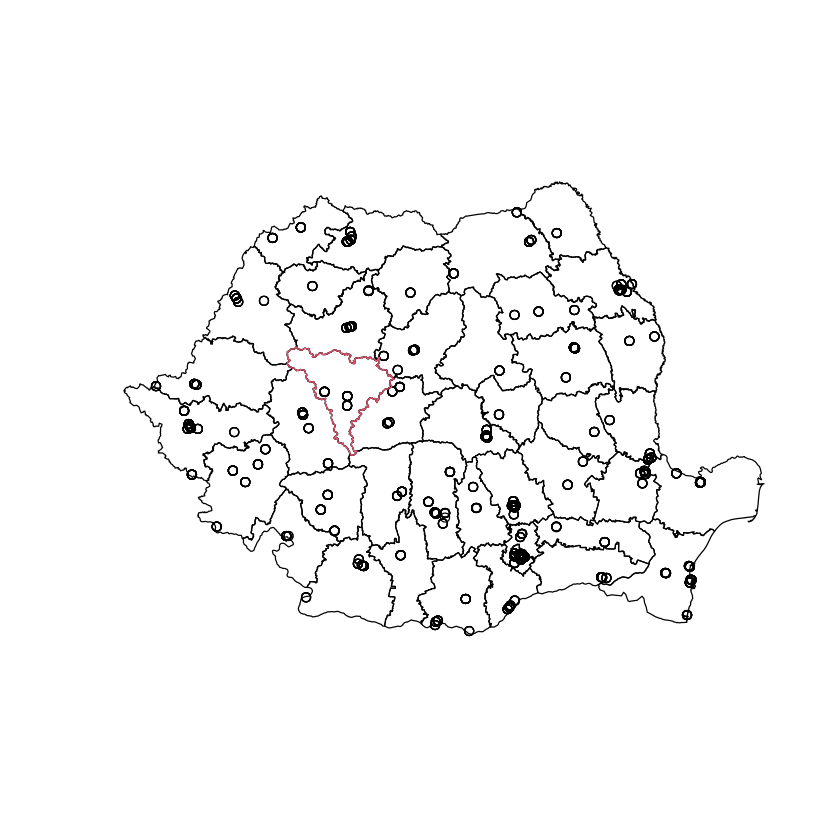

In [ ]:
# plot(roMetadata$Longitude, roMetadata$Latitude)
# library("rworldmap")
# worldMap <- getMap()
# RoCoord <- data.frame(worldMap@polygons[[which(worldMap$NAME=="Romania")]]@Polygons[[1]]@coords)
# lines(RoCoord$X1, RoCoord$X2, col=2)

# library("maps")
# library("mapdata")
# RoCoord <- map('worldHires','Romania')
# plot(RoCoord$x, RoCoord$y, col=2, type = "l", lty = 1)
# points(roMetadata$Longitude, roMetadata$Latitude)

# https://keithnewman.co.uk/r/maps-in-r-using-gadm.html
# https://gadm.org/download_country_v3.html
# https://biogeo.ucdavis.edu/data/gadm3.6/Rsp/gadm36_ROU_1_sp.rds
RoMapFilePath <- file.path("data", "gadm36_ROU_1_sp.rds")
RoMap <- readRDS(RoMapFilePath)
plot(RoMap)
points(roMetadata$Longitude, roMetadata$Latitude)
lines(RoMap@polygons[[1]]@Polygons[[1]]@coords, col=2)

### O singură dimensiune

În continuare vom prezenta metode de explorare a unei singuri dimensiuni (variabilă).

Prima metodă care nu este un grafic este denumită sumarizarea celor 5 numere.
Vom lua în considerare poluarea de $PM_{2.5}$ în România. Conform recomadării
Uniunii Europene nu trebuie să avem o medie anuală mai mare de 25.

In [ ]:
summary(RoPollutionData2019[RoPollutionData2019$PolluantCode==6001, "Value"])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00   10.54   11.87   17.15   92.75 

Se observă că respectăm media, dar avem valori în timpul anului care depășesc media.

A doua metodă ce este un grafic de explorare este repzentată de boxplot-uri. Acestea
ne arată zona în care se află valoriile variabilei noastre.

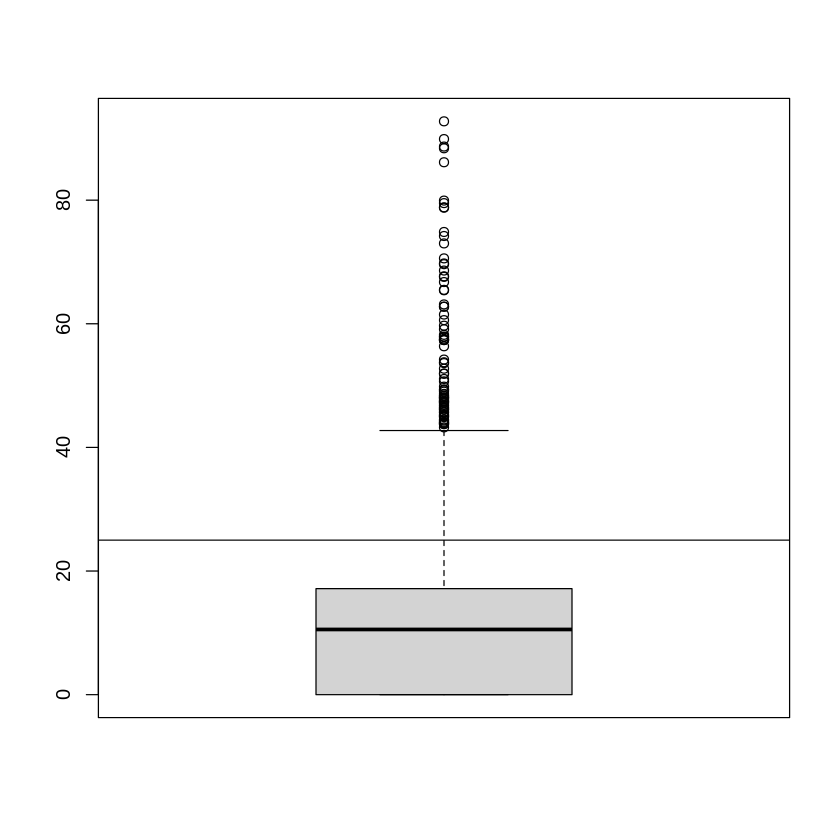

In [ ]:
boxplot(RoPollutionData2019[RoPollutionData2019$PolluantCode==6001, "Value"])
abline(h=25)

O metodă asemănătoare care ne poate oferi o perspectivă diferită este folosirea
histogramelor. Aici putem explora cu ajutorul lațimii de bandă. Este foarte
ușor să ajungem în extreme folosind valori prea mari sau prea mici pentru datele
noastre.

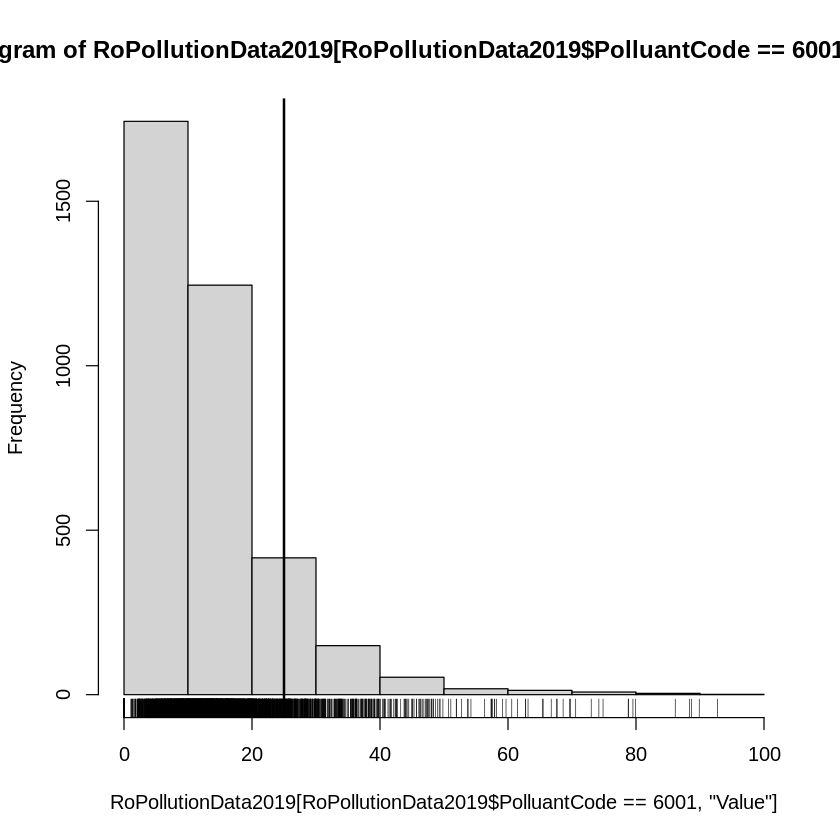

In [ ]:
hist(RoPollutionData2019[RoPollutionData2019$PolluantCode==6001, "Value"], breaks = 10)
rug(RoPollutionData2019[RoPollutionData2019$PolluantCode==6001, "Value"])
abline(v=25, lwd=2)

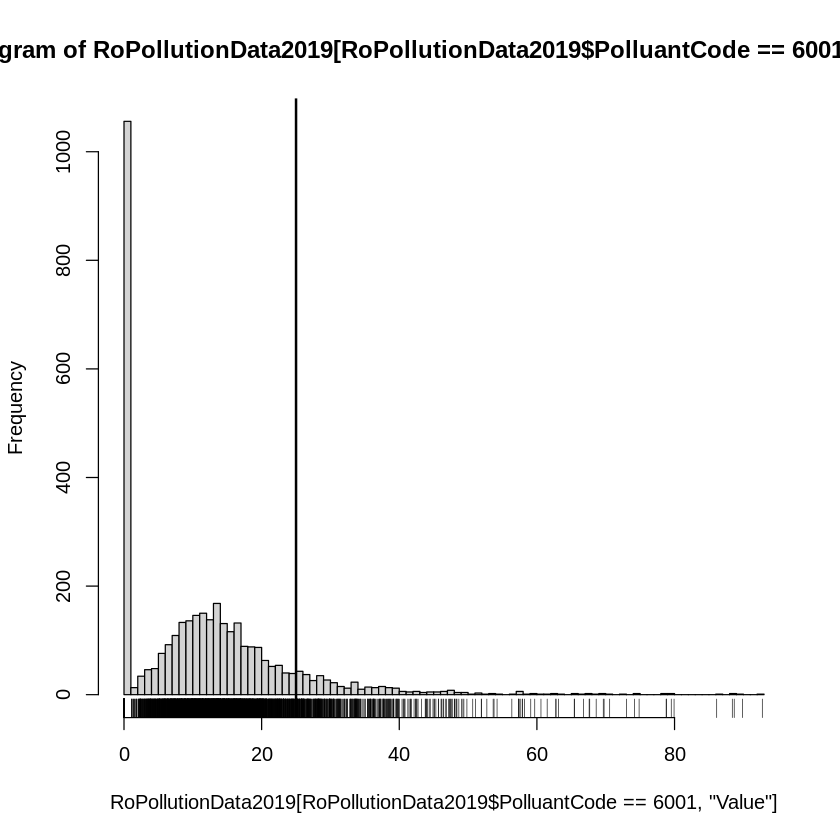

In [ ]:
hist(RoPollutionData2019[RoPollutionData2019$PolluantCode==6001, "Value"], breaks = 100)
rug(RoPollutionData2019[RoPollutionData2019$PolluantCode==6001, "Value"])
abline(v=25, lwd=2)

Cele două metode prezentate mai sus sunt specifice datelor continue. Pentru
valori discrete putem folosi barplot-uri.

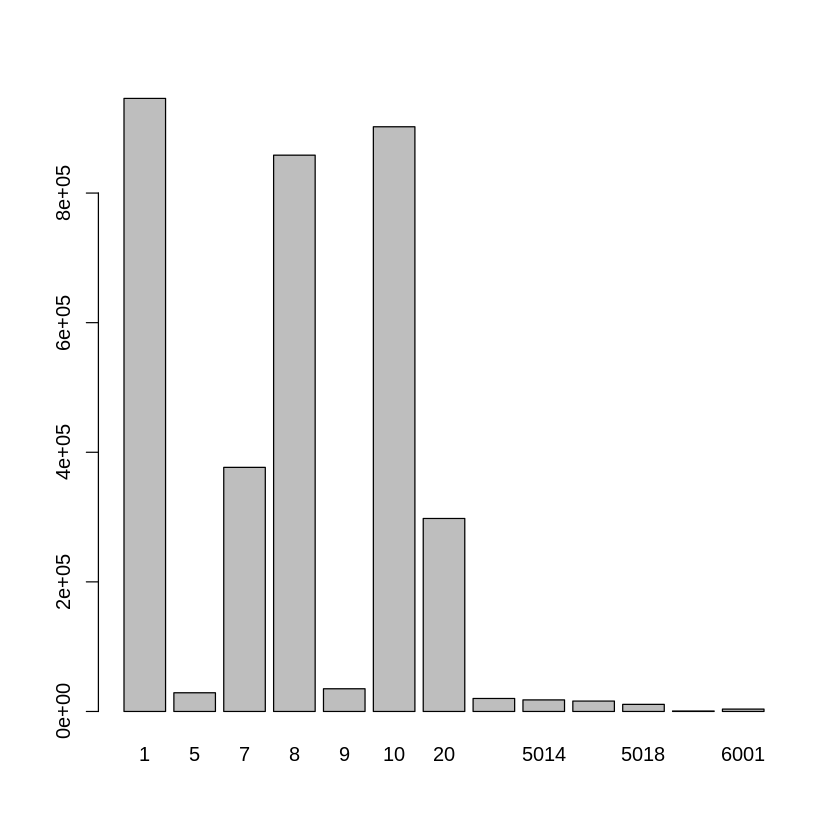

In [ ]:
barplot(table(RoPollutionData2019$PolluantCode))

Putem observa pentru ce poluanți avem cele mai multe observații. Putem observa numărul
de stații per poluant.

`summarise()` regrouping output by 'PolluantCode' (override with `.groups` argument)



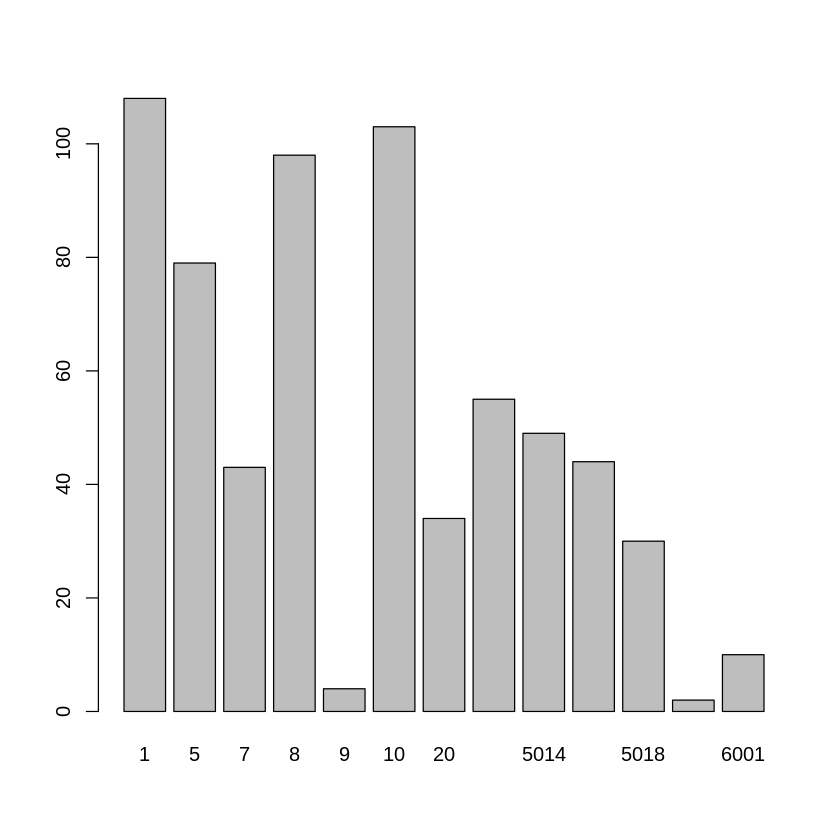

In [ ]:
tmp <- (RoPollutionData2019 %>% group_by(PolluantCode) %>% summarise(unique(ID)) %>% select(PolluantCode))$PolluantCode
barplot(table(tmp))

### Două sau mai multe dimensiuni dimensiuni

Putem folosi graficele de o singură dimensiune grupând
datele noastre în funcție de variabilele ce reprezintă următoarele dimensiuni
sau putem folosi grafice cu 2 axe.

Vom grupa datele în funcție de stație pentru valoarea poluantul $PM_{2.5}$ în
boxplot-uri.

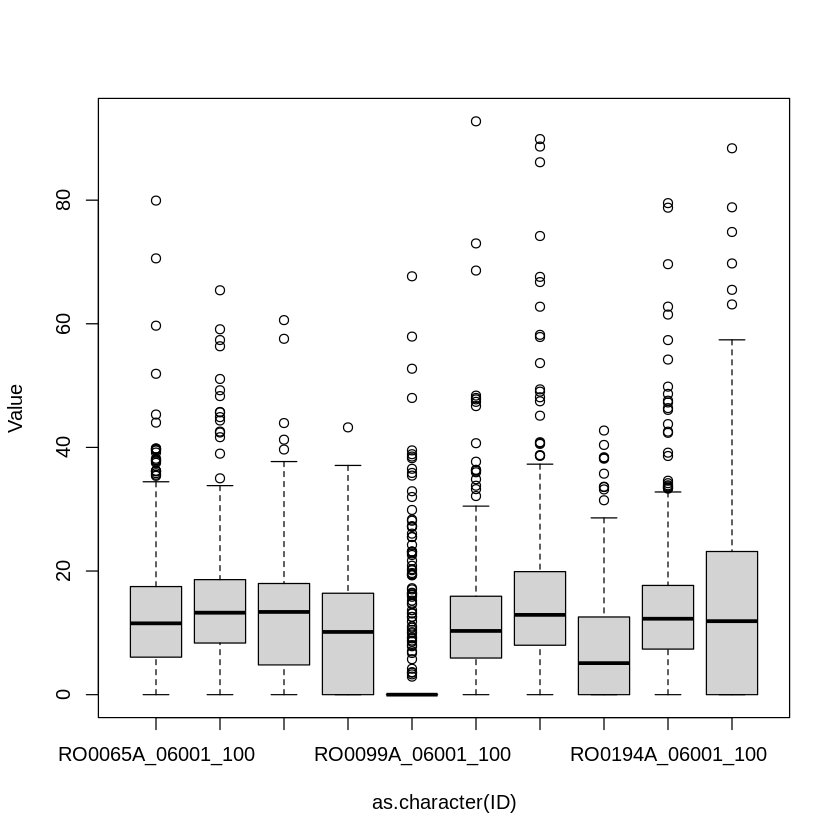

In [ ]:
roPM_2_5 <- RoPollutionData2019[RoPollutionData2019$PolluantCode=="6001", ]
boxplot(Value ~ as.character(ID), data = roPM_2_5)

 Putem folosi mai multe histograme pentru a afișa distribuția valoriilor pentru
 2 stați.

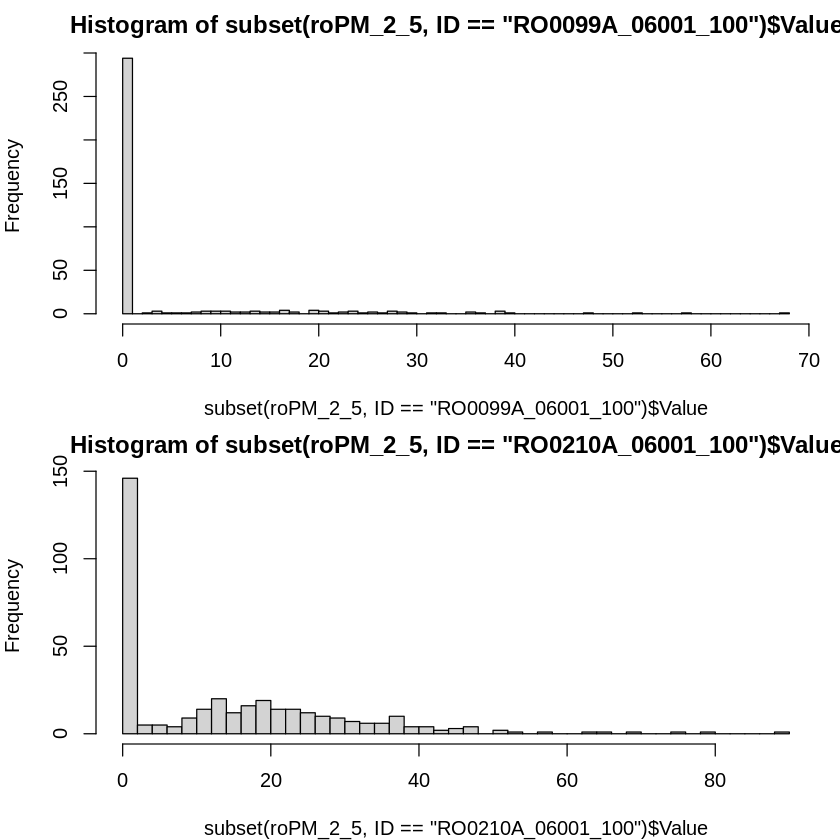

In [ ]:
par(mfrow= c(2,1), mar=c(4,4,2,1))
hist(subset(roPM_2_5, ID=="RO0099A_06001_100")$Value, breaks = 50)
hist(subset(roPM_2_5, ID=="RO0210A_06001_100")$Value, breaks = 50)

O altă metodă este de a explora legătura dintre 2 variabile continue.

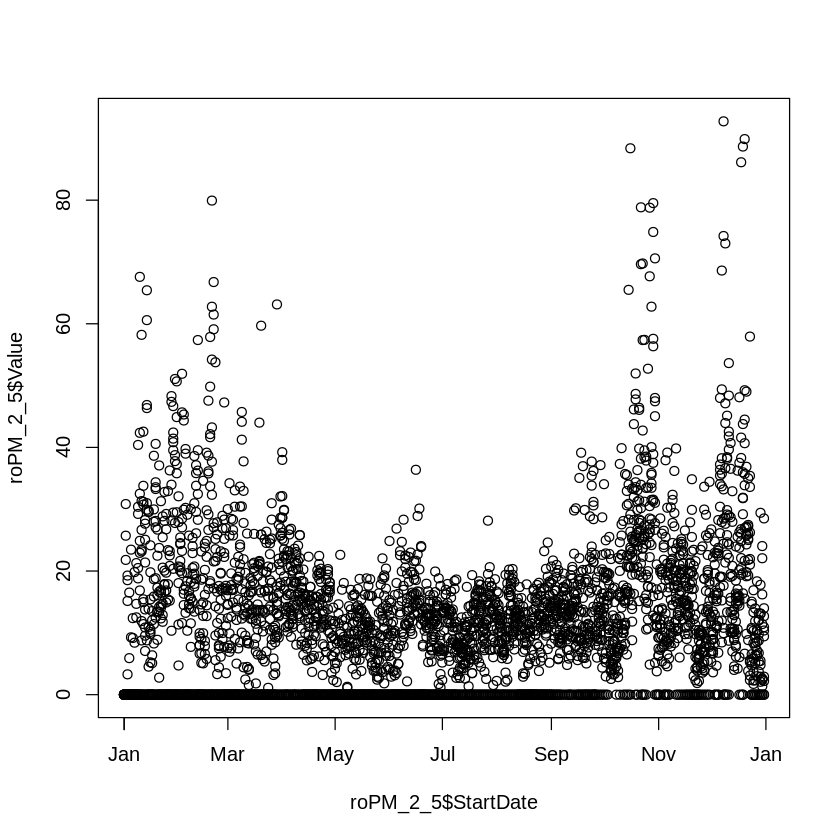

In [ ]:
plot(roPM_2_5$StartDate, roPM_2_5$Value)

 Putem adăuga o altă varaibilă prin grupări sau colorarea punctelor.
 De exemplu mai jos afișăm cele valoarea poluantului în timp colorând în funcție
 de stație. Totuși nu știm ce reprezintă fiecare culoare.

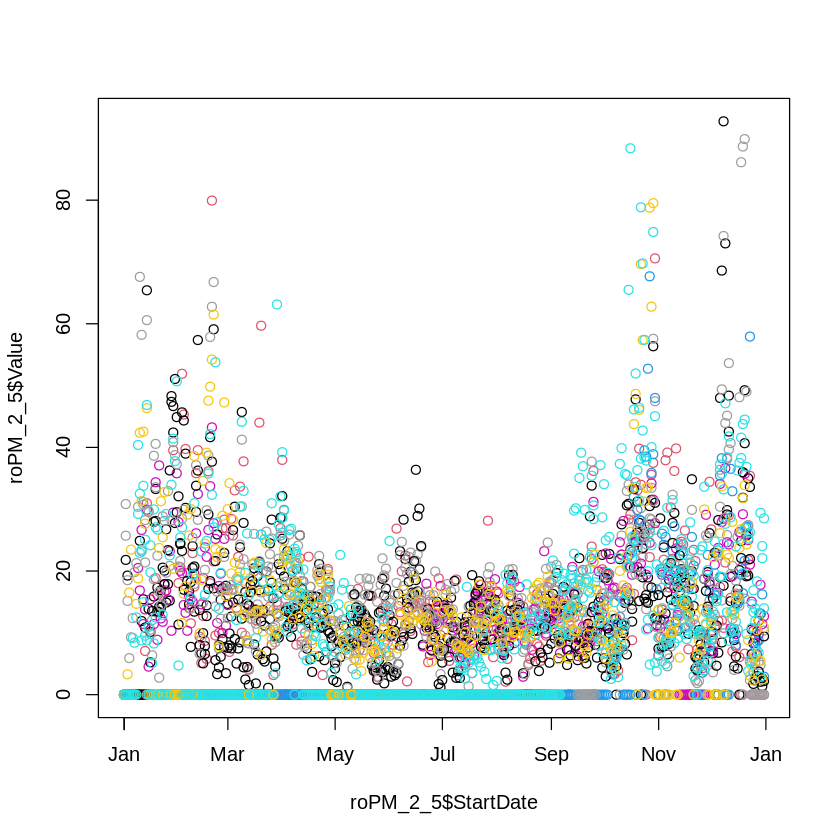

In [ ]:
plot(roPM_2_5$StartDate, roPM_2_5$Value, col=roPM_2_5$ID)

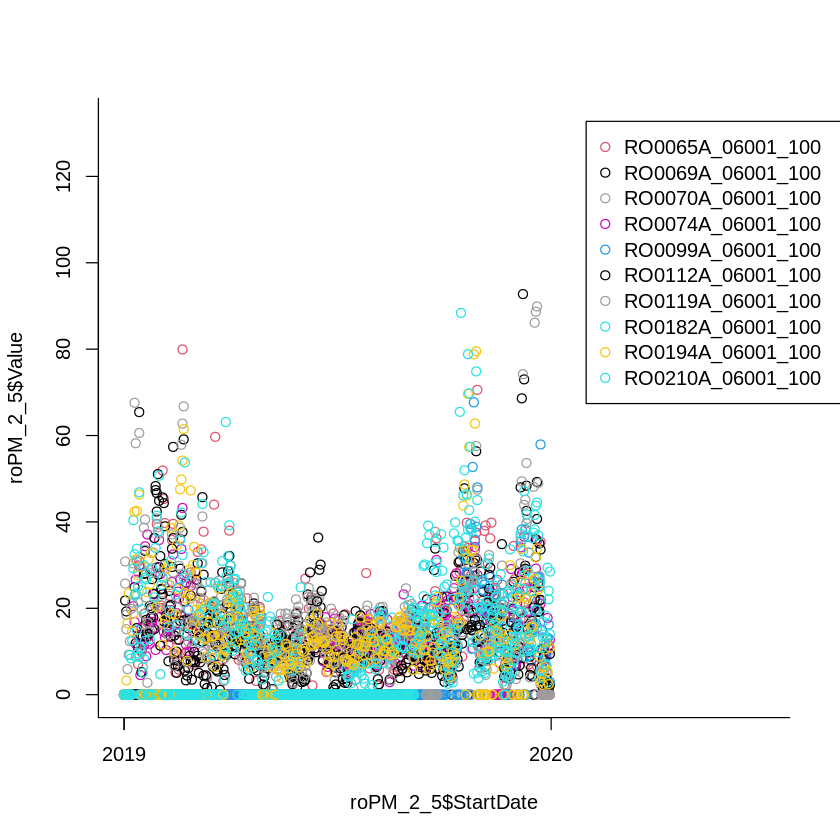

In [ ]:
plot(roPM_2_5$StartDate, roPM_2_5$Value, col=roPM_2_5$ID, ylim = c(0,  max(roPM_2_5$Value) + 40), bty='L', xlim = c(min(roPM_2_5$StartDate), max(roPM_2_5$StartDate) + months(6)))
 par(xpd=TRUE)
legend(max(roPM_2_5$StartDate) + months(1), max(roPM_2_5$Value) + 40 ,legend=unique(roPM_2_5$ID),
       col=unique(roPM_2_5$ID), pch = 1)

O altă metodă este de a separa graficul în mai multe grafice în funcție de a
treia variabilă.

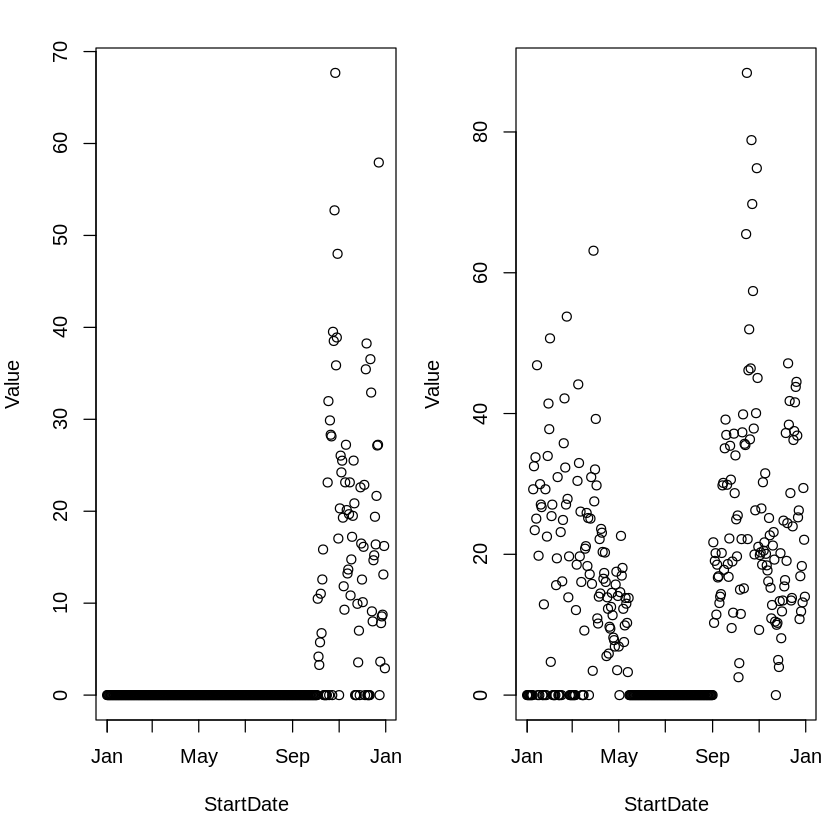

In [ ]:
par(mfrow= c(1,2), mar=c(5,4,2,1))
with(subset(roPM_2_5, ID=="RO0099A_06001_100"), plot(StartDate, Value))
with(subset(roPM_2_5, ID=="RO0210A_06001_100"), plot(StartDate, Value))

## Sisteme Grafice în R

În R sunt 3 sisteme grafice principale: base, lattice și ggplot2.
Base este sistemul grafic de bază, care folosește modelul artistului,
ce îl face o opțiune bună pentru graficele de explorare.
Principiul este simplu faci graficul inițial cu date. Peste acesta poți afăuga rând
pe rând diferite obiecte grafice ajutăroare precum linii, regresi, puncte.
Însă nu ai opțiunea de a merge înapoi în acțiuni. Dacă ai greșit va trebui să o iei
de la capăt. Este intuitiv și poți merge în detaliu cu explorarea.

Lattice este un sistem prin care graficul este creat cu o singură funcție 
și necesită multe detalii. Se folosește când avem date condiționate și este necesar
să avem un număr mar de grafice într-o singură figură. Din păcate graficul nu poate fi 
modificat după. Sumedenia de valori implicite îl face atractiv 
pentru afișare și analiză.

ggplot2 este un sistem bazat pe gramtica teroretică a graficelor și conține
compenente din ambele sisteme prezentate anterior. Se pot adăuga pe rând informați
în grafic și are valori implicite ce ajută în formatare.


### Base System

Sistemul de bază din R folosește biblotecile graphics pentru grafice (plot,hist,boxplot) 
și grDevices pentru afișare (ecranul sau documente specifice (ex: pdf, png)).
Înainte de a implement orice grafic trebuie să trecem prin gândire următoarele întrebări.
  - Unde va fi afiașt graficul ? Pe ecran, într-un fișier ? În funcție de răspuns
  va trebui să setăm dispozitivul grafic. Anumite sisteme grafice au
  proprietăți mai bune pe anumite dizpozitive grafice (ex base pe ecran, lattice
  imagine și web, ggplot2 documente printate). Dacă vom folosim graficul în prezentare
  este recomandat să avem un font mai mare. Dacă folosim graficul pentru publicare
  este recomandat să luăm în calcul o afișare alb-negru.
  - Pentru ce folosim graficul ? Temporar, pentru explorare sau pentru publicare/analiză.
  Pentru explorare base este suficient și recomandat, însă pentru analiză celelalte
  două sisteme grafice sunt mai avantajoase.
  - Vom avea un număr mare de puncte ? ggplot2 se descurcă la afiașarea unui 
  număr mare de puncte, în timp ce lattice este mai avatanjos pentru un număr
  mai mare de grafice cu puține puncte și condiționate de varaibile.
  - Va trebuie să redimensionezi dinamic graficul ? Pentru redimensiunare contează
  formatul de fișier în care va fi salvat graficul. Formatul vectorial este mai
  avantajos.

Sistemul grafic de bază este folosit în mare parte pentru formarea graficelor 
bidimensionale și conține 2 etape: inițializarea graficului și adnotarea lui cu 
elemente specifice. Inițializarea graficului se face cu una din funcțiile (plot,
hist, barplot, boxplot) și va porni un dispozitiv grafic implicit (dacă nu este 
setat deja unul). Inițializarea introduce sistemul de axe, limitele și punctele 
inițiale. Acestea pot fi setate prin parametri pentru funcția inițială. Ei pot 
fi observați cu ajutorul:

In [ ]:
?par

Vom trece prin funcțiile de inițializare. Vom folosi datele pentru 
o singură stație și poluantul $PM_{2.5}$.

In [ ]:
roPM_2_5_RO0119A <- subset(roPM_2_5, ID=="RO0119A_06001_100")

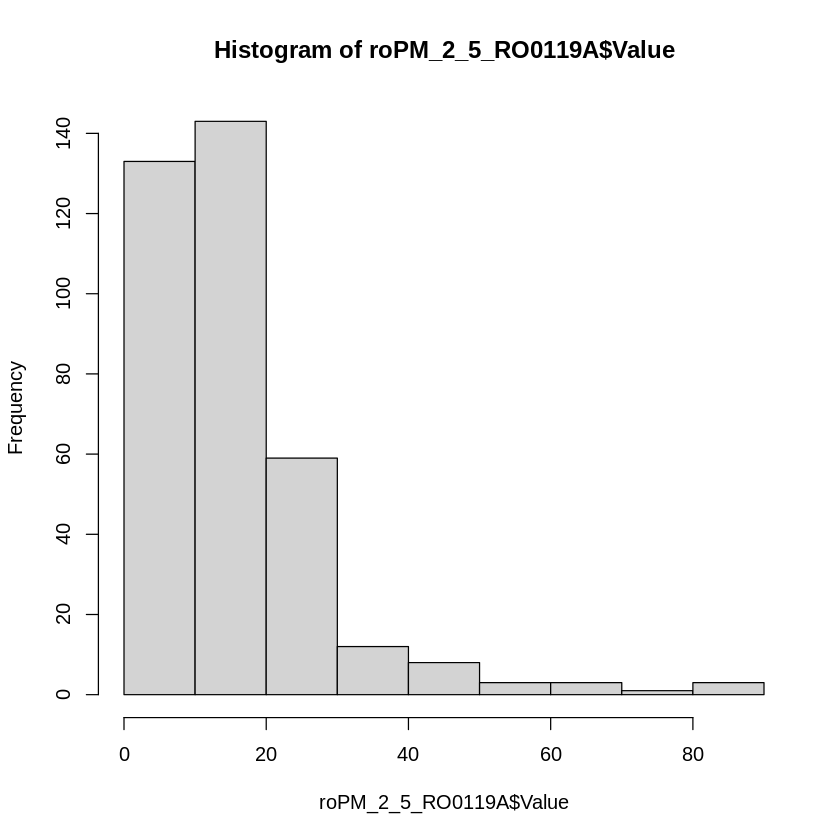

In [ ]:
hist(roPM_2_5_RO0119A$Value)

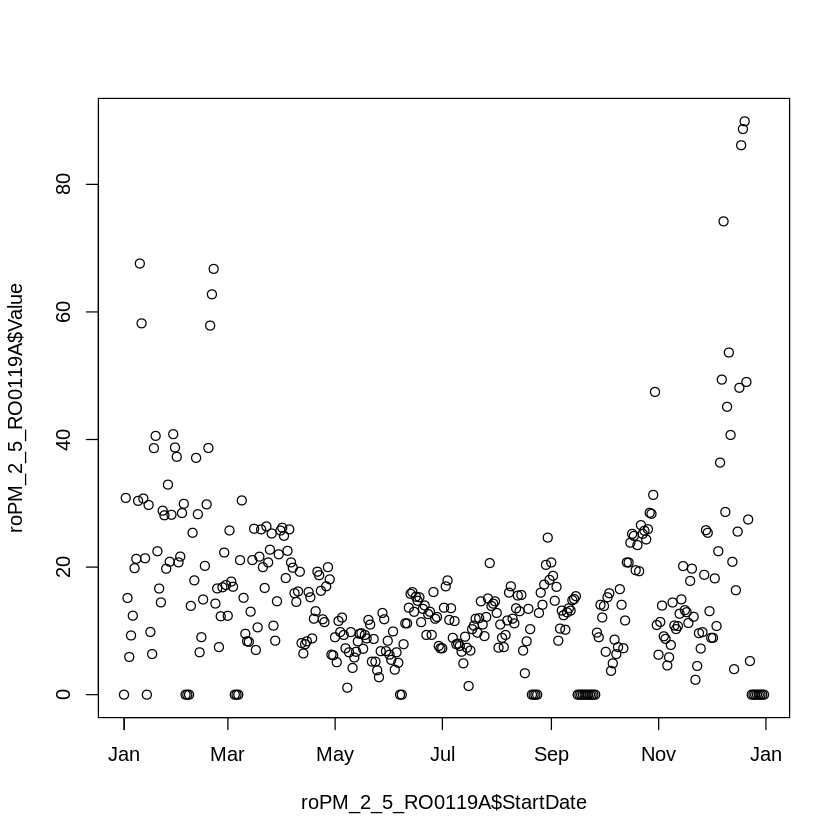

In [ ]:
plot(roPM_2_5_RO0119A$StartDate, roPM_2_5_RO0119A$Value)

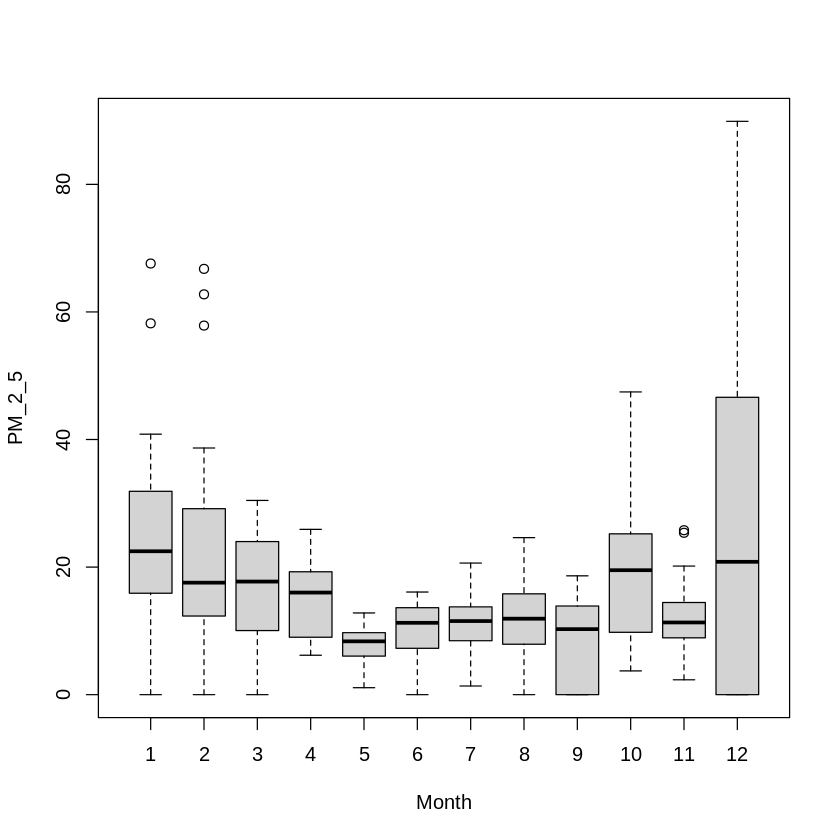

In [ ]:
roPM_2_5_RO0119A_month <- roPM_2_5_RO0119A %>% transform(Month = factor(month(roPM_2_5_RO0119A$StartDate)))
boxplot(Value ~ Month, roPM_2_5_RO0119A_month, xlab="Month", ylab="PM_2_5")

Mai sus am modificat 2 parametrei impliciti xlab și ylab. Parametrii ce pot fi 
modificați în cadrul funcției de inițializare a datelor sunt:
  - pch -  se referă la formatul punctelor. Implicit este un cerc deschis. 

In [ ]:
example(points)

  - lty - se referă la tipul de linie folosit. Implicit e solidă, 
  dar poate fi punctată sau tăiată. Depinde de unde va fi afișat graficul:
  Pe o prezentare  nu e inidcat să ai tipuri diferite de linii ci
  să le diferențiezi cu ajutorul culoriilor; În cazul articolelor care ajung 
  într-un formt alb-negru este mai indicat să folosești tipul liniei decât culoarea.
  - lwd - lâțimea unei linii. Pentru o prezentare este recomandată o valoare mai mare.
  - col - culoarea. În articole trebuie să fim atenți de modul cum vor fi percepute
  în alb-negru culoriile. Se recomandă folosirea unei palete de culori.
  - xlab,ylab - denumiriile axelor.
  - type - Setează tipul graficului. Poate avea următoarele valori:
      - type="." - pentru puncte (valoarea implicită).

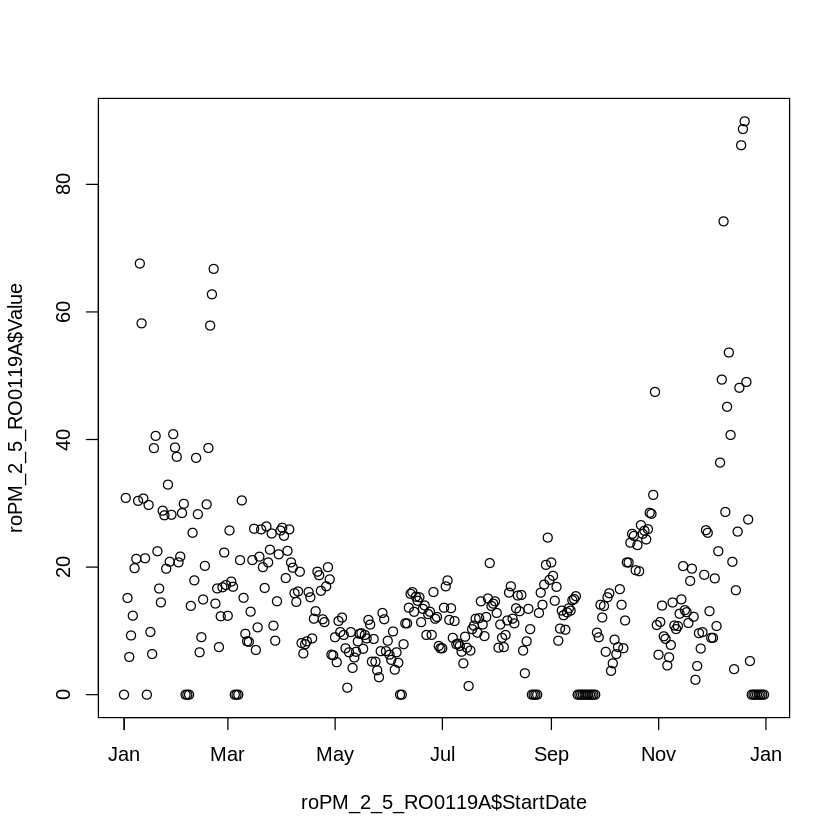

In [ ]:
plot(roPM_2_5_RO0119A$StartDate, roPM_2_5_RO0119A$Value, type="p")

      - type="l" - pentru linii.

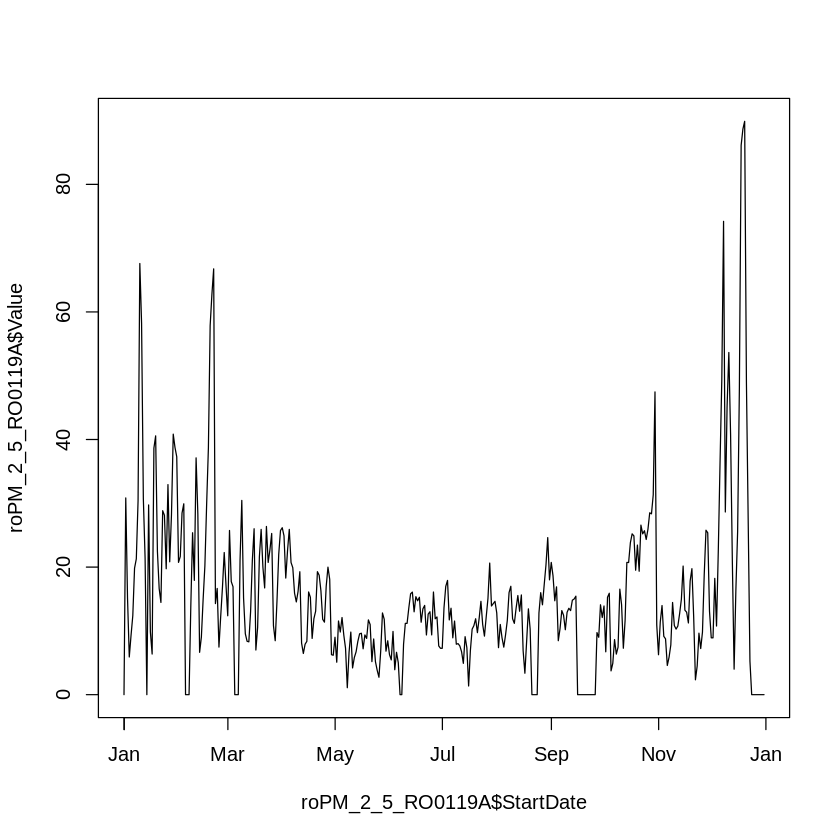

In [ ]:
plot(roPM_2_5_RO0119A$StartDate, roPM_2_5_RO0119A$Value, type="l")

      - type="b" - pentru puncte și linii care nu se suprapun.

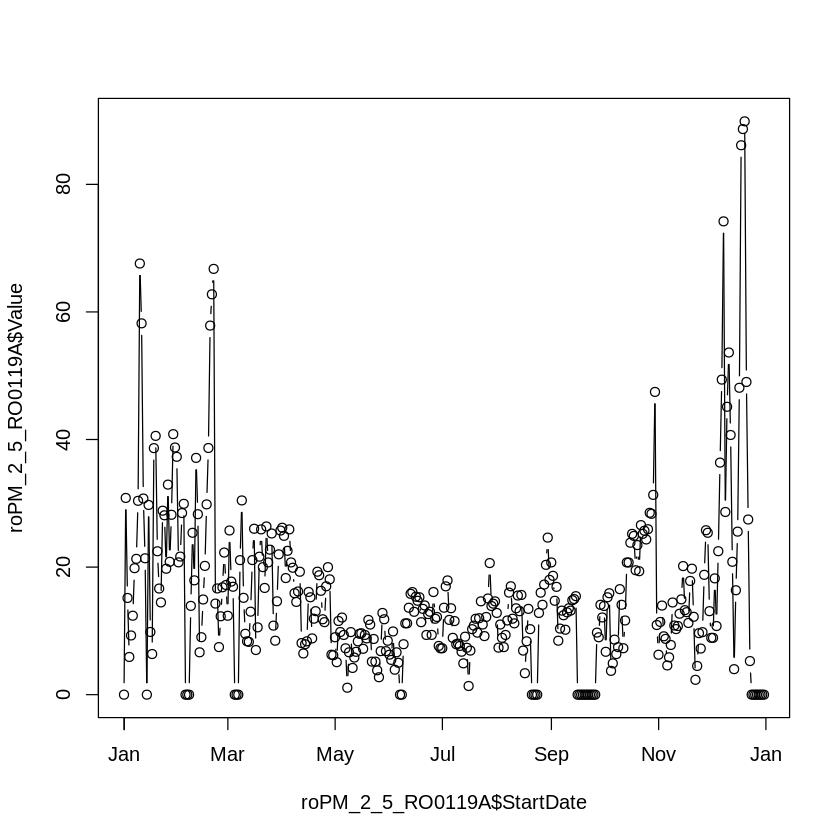

In [ ]:
plot(roPM_2_5_RO0119A$StartDate, roPM_2_5_RO0119A$Value, type="b")

      - type="o" - pentru puncte și linii care se suprapun.

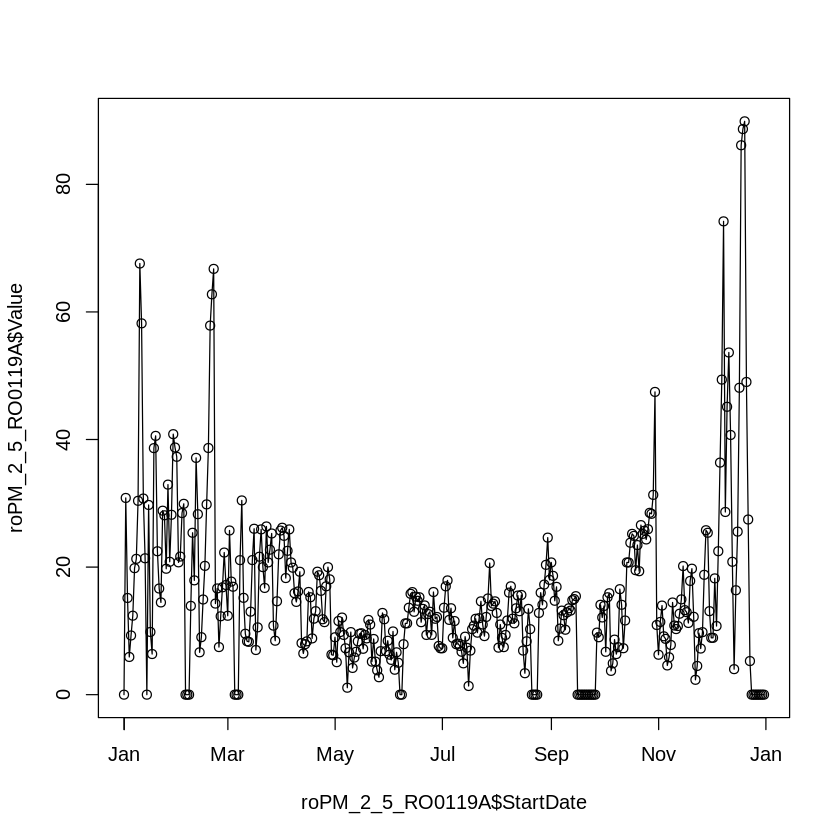

In [ ]:
plot(roPM_2_5_RO0119A$StartDate, roPM_2_5_RO0119A$Value, type="o")

      - type="h" - pentru histograma (doar modul de afișare).

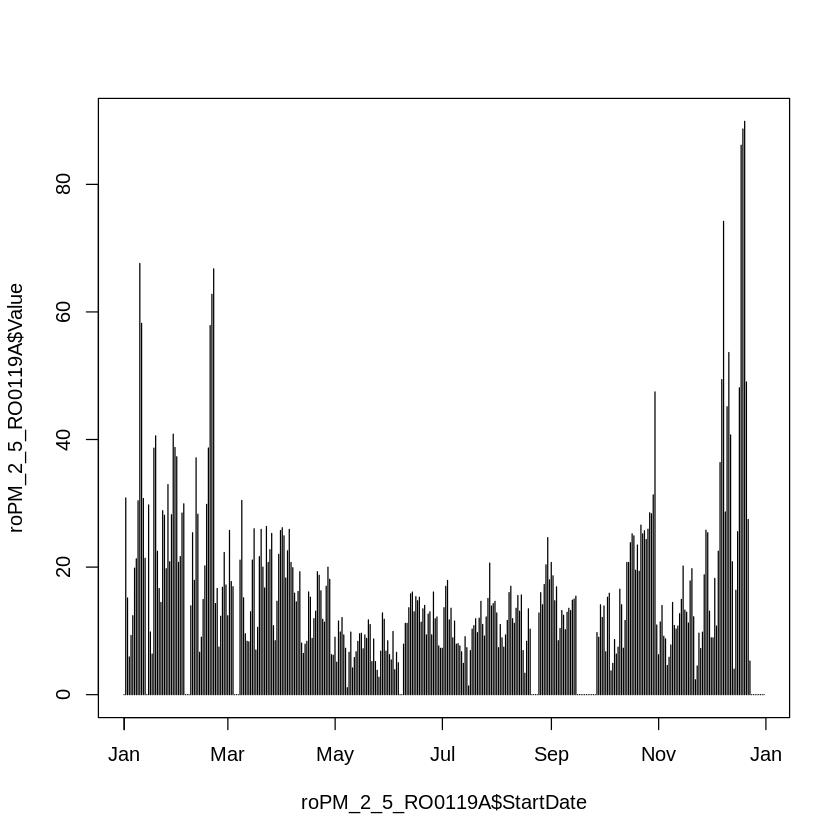

In [ ]:
plot(roPM_2_5_RO0119A$StartDate, roPM_2_5_RO0119A$Value, type="h")

      - type="s" - pentru tipul "scară"

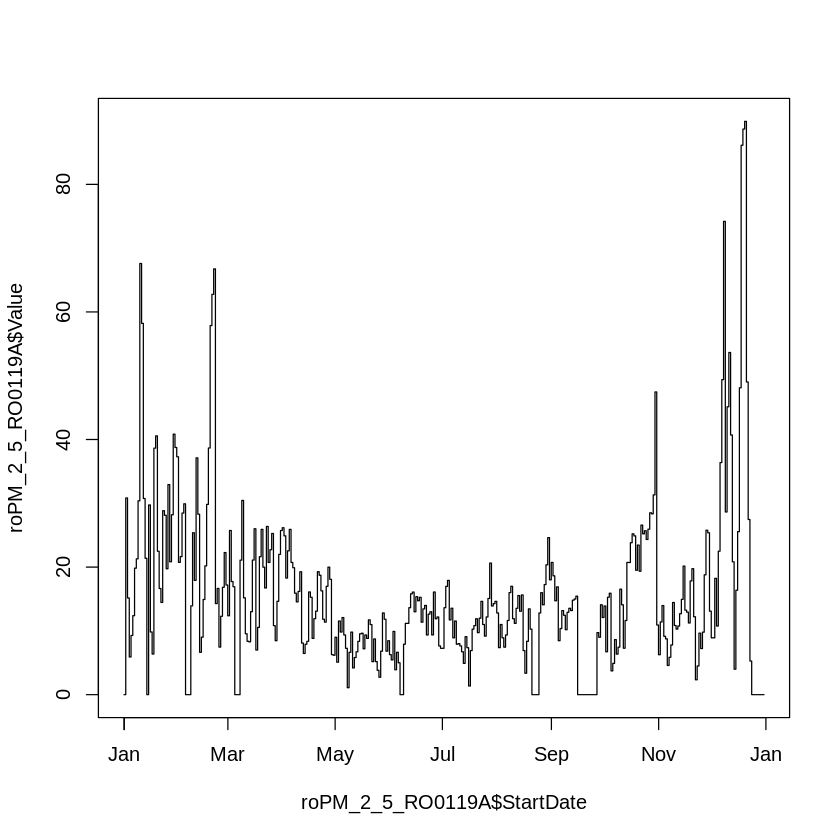

In [ ]:
plot(roPM_2_5_RO0119A$StartDate, roPM_2_5_RO0119A$Value, type="s")

      - type="n" - doar inițializează axele și sistemul de coordonate.

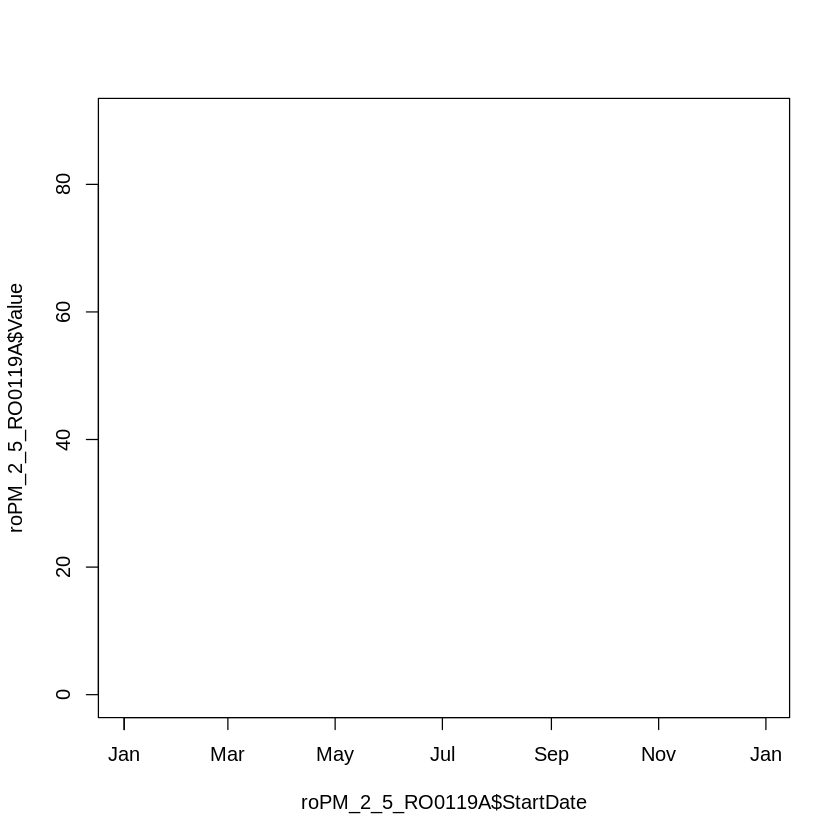

In [ ]:
plot(roPM_2_5_RO0119A$StartDate, roPM_2_5_RO0119A$Value, type="n")

Prin funcția par() putem seta următorii parametri globali pentru dizpozitivul grafic
curent:
  - las - orientarea axelor
  - bg - culoarea de fundal
  - mar - dimenziuniile mariginii pentru sistemul de axe (Jos, Stânga, Sus, Dreapta)
  - oma - dimensiuniile marginiil pentru grafic
  - mfrow - numărul de grafice pe rând, coloană - se completează rânduriile prima data
  - nfcol - numărul de grafice pe coloană, rând - se completează coloanele prima dată

Adnotării prezente în sistemul grafic de bază:
  - lines
  - points
  - text
  - title
  - mtext
  - axis
  

#### Dispozitive Grafice

Limbajul R are trei tipuri de dipozitive grafice:
  - Ecranul (depinde de sistemul de operare pe care îl ai și de numărul de ecrane).
  El este dizpozitivul implicit și se manifestă printr-o fereastră cu graficul.
  - Fișiere de tip vector. Advantaje: portabilitate, redimensionare. Dezavantaje: nu pot avea foarte multe puncte.
     - pdf
     - svg
     - postrcript
  - Fișiere de tip bitmap. Advanataje: bun pentru multe puncte. Dezavantaj: redimensionare
     - png 
     - jpeg
     - tiff
     - bmp

Deschiderea unui dispozitiv grafic

In [ ]:
# pdf(file="myplot.pdf")
# plot...
# dev.off()

Copiere -

In [ ]:
#plot...
#dev.copy(png, file="myplot.png")
#dev.off()

### Latice System

Al doilea sistem grafic din R este Lattice. Acesta este concentrat pe grafice
cu o densitate mare de variabile. Față de celelate sisteme tot graficul este
creat cu un singur apel de funcție, ce conține o variate mare de valori
implicite care ajută în formatarea lor înlocuind multe din funcțiile sistemului
grafic de bază. Un dezavantaj vizibil este că nu putem face adnotări graficelor,
fiind necesară refacerea lui dacă vrem să modifică/adăugam informații. Din această
cauză acest sistem grafic nu este folosit pentru grafice de explorare. Utilitatea
lui este de formare a graficelor de analiză când știm deja ce date vrem să afișăm
și modul în care dorim să le afișăm.

Funcțiile prinicpale în sistemul grafic Lattice sunt:
  - xyplot - pentru grafice simple pe două dimensiuni
  - bwplot - boxplot
  - histogram
  - stripplot - asemănător bwplot dar cu puncte
  - dotplot - renumitul grafic "vioară"
  - splom - grafice în matrice (TODO: autorul a jucat CS, puteți folosi link-ul 
  [ http://www.unige.ch/ses/sococ/cl/r/scatmat.e.html ] - slabe șanse să vă fie util)
  - levelplot, contourplot - pentru imagini

Primul argument pentru funcțiile din sistemul Lattice este o formulă. Formula este
într-un format statistic, de aici și utilizarea acestui sistem în rândul persoanelor
cu afinități statistice. "Egalul" din formulă este reprezentat de caracterul "\~" . 
Caracterul "|" reprezintă dependența și duce la împărțirea datelor în funcție de
câmpuriile date. Acest lucru duce la crearea câte unui grafic pentru fiecare
grupare. Caracterul "|" este opțional. Între "\~" și "|" se află variabilă pentru
axa oX.

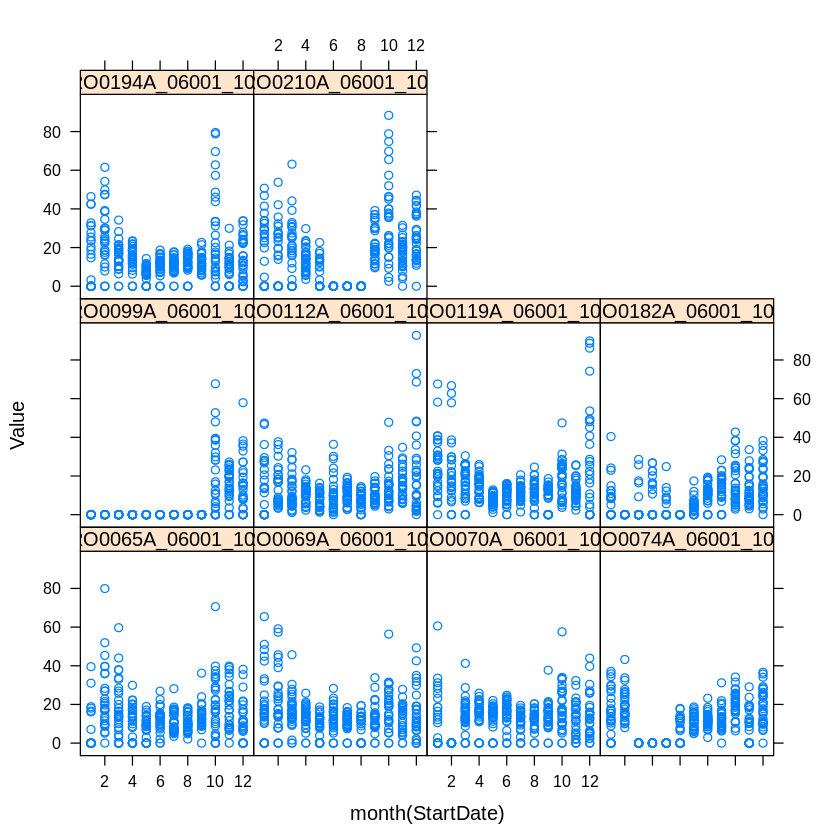

In [ ]:
xyplot(Value ~ month(StartDate) | ID , data = RoData2019_PM_2_5)

În cazul în care avem mai multe grupuri de date și dorim să controlăm structura de afișare
putem utiliza paramatreul layout.

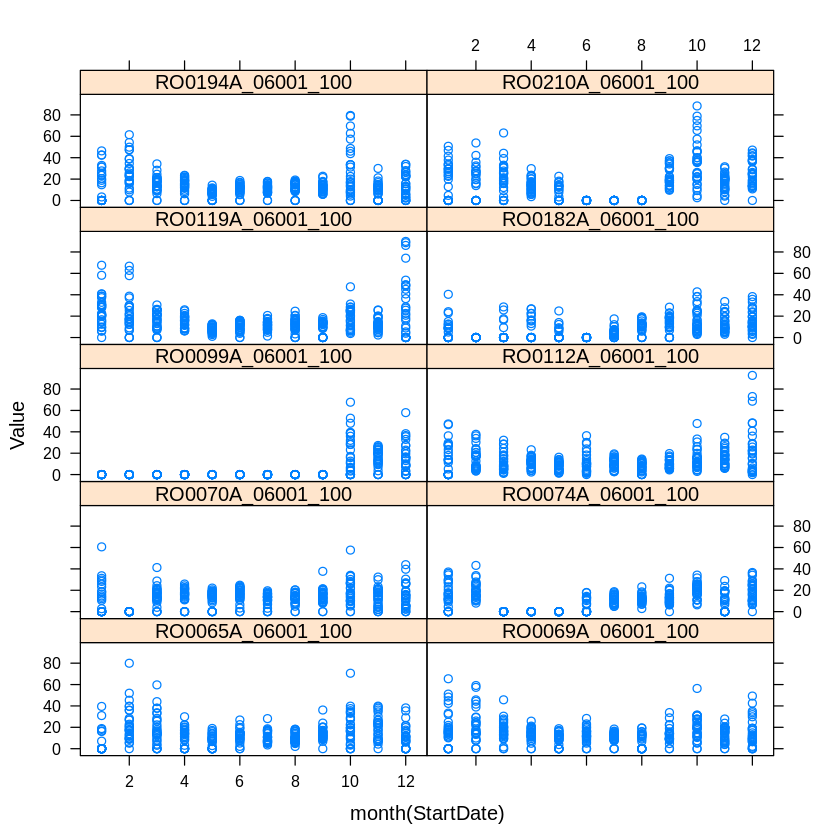

In [ ]:
xyplot(Value ~ month(StartDate) | ID , data = RoData2019_PM_2_5, layout = c(2, 5))

Funcțiile din Lattice returnează un obiect a carui funcție print returnează
graficul observat de noi.

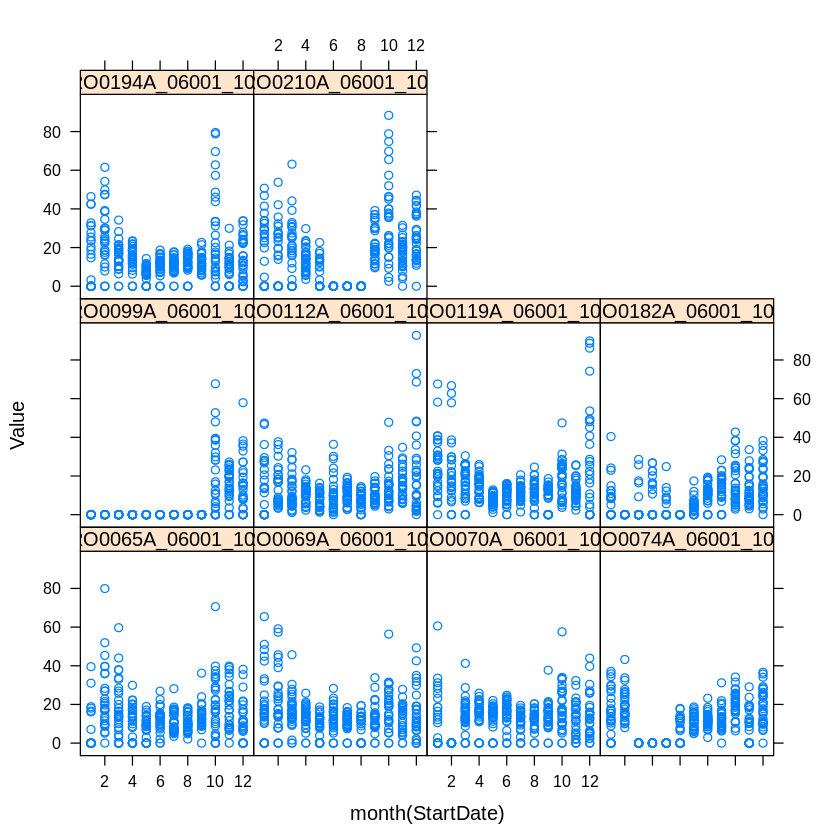

In [ ]:
a <- xyplot(Value ~ month(StartDate) | ID , data = RoData2019_PM_2_5)
print(a)

O altă funcționalitate din sistemul grafic Lattice pentru grupuri de date
este acela de a putea controla fiecare grafic cu funcții panel.

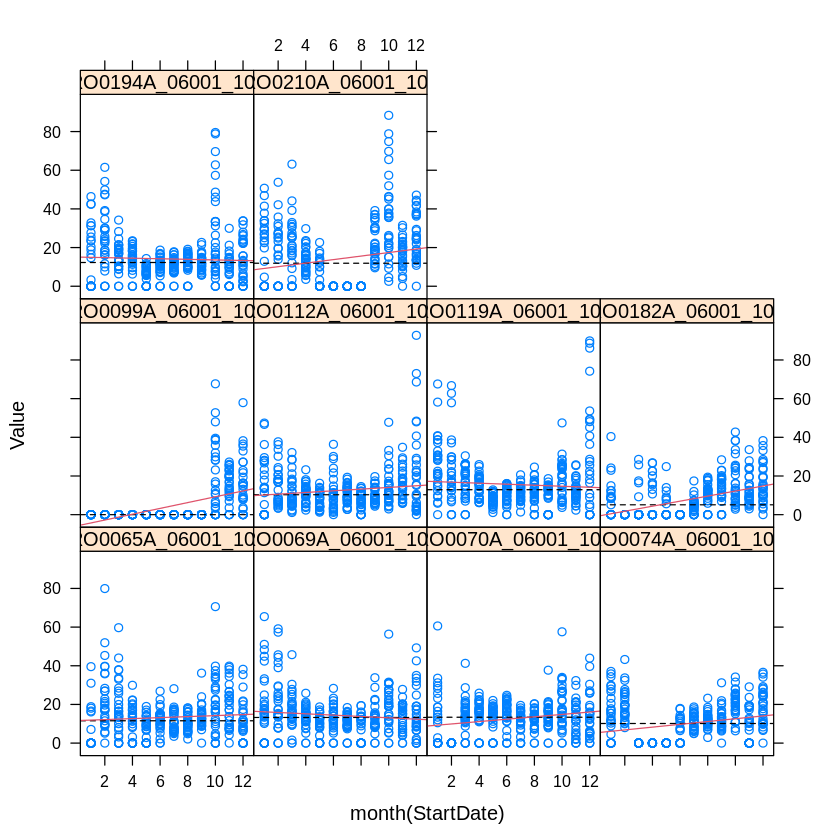

In [ ]:
xyplot(Value ~ month(StartDate) | ID , data = RoData2019_PM_2_5, panel=function(x, y, ...) {
  panel.xyplot(x, y, ...)
  panel.abline(h = median(y), lty = 2)
  panel.lmline(x, y, col=2)
})

### Ggplot2 System

Al treilea sistem grafic din R este ggplot2. Acesta are ca inspirație lucrarea
"Grammar of graphics" de Leland Wilkinson [ https://www.springer.com/gp/book/9780387245447 ].
Teza conceputlui definit în carte este de a "scurta distanța de la minte la grafic
pe pagină" prin transformarea conceptelor grafice în verb, substantiv sau adjectiv.
O scurtă definiție din carte:
" In brief, the grammar tells us that a statistical graphic is a mapping from
data to aesthetic attributes (colour, shape, size). The plot may also contain
statistical transformations of the data and is drawn on a specific coordinate system"

Din asta putem extrage principale componente din ggplot2:
  - data - datele de intrare date de noi. Obligatoriu să fie de tipul data.frame .
  - aesthetic attributes - atribute pentru datele noastre în grafic. Vom observa
  că sunt setate prin folosirea funcției aes.
  - geoms - obiecte grafice ce vor apărea în grafic precum puncte,
  linii sau poligoane.
  - facets - În caz de avem grafice condițioante de anumite variabile și dorim să le
  împărțim în grupuri.
  - stats - transformări statistice precum: cuantile sau regresii.
  - scales - atribute globale care afectează "aesthetic attributes".
  - coordinate system - sistemul de coordonate.
  
Toate aceste componente sunt setate separat și specific.

Ggplot2 utilizează două modele diferite: unul asemănător sistemului lattice
prin funcția qplot și celălalt asemănător sistemului grafic de bază print utilizarea
ggplot și a unor funcții predefinite.

#### qplot

qplot este o funcție asemănătoare funcțiilor de bază din sistemul lattice doar
că utilizeazîă conceptele de gramatică grafică în detrimentul celor statistice.

În mod implicit parametrii suplimentari pentru qplot sunt considerați atribute
pentru datele data. Primi 2 parametri sunt variabilele pe axa oX și axa oY.

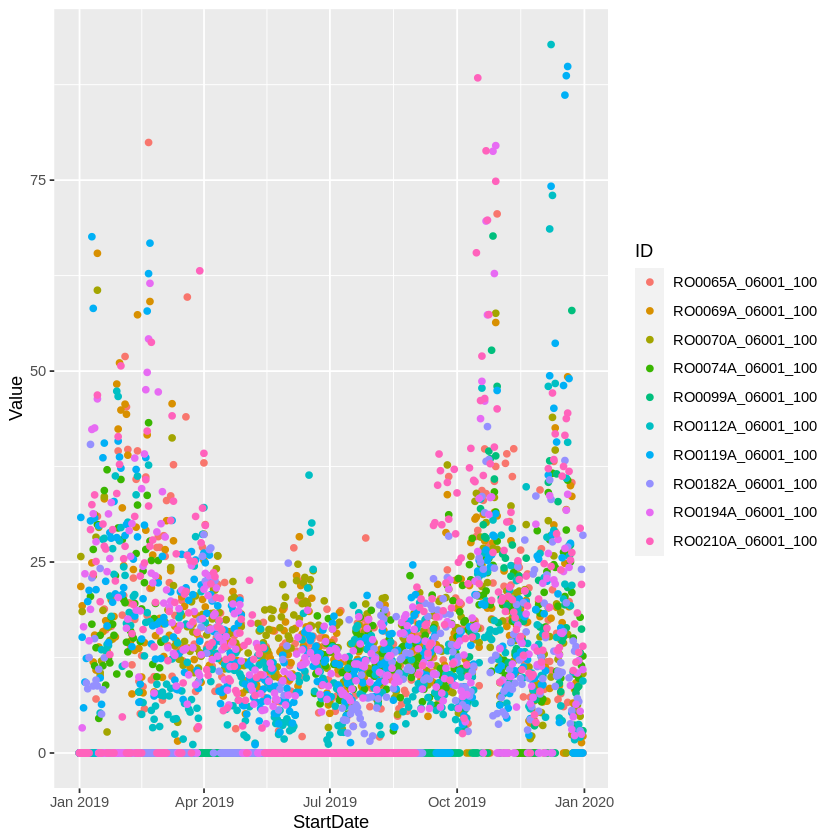

In [ ]:
qplot(StartDate, Value, data = RoData2019_PM_2_5, color=ID)

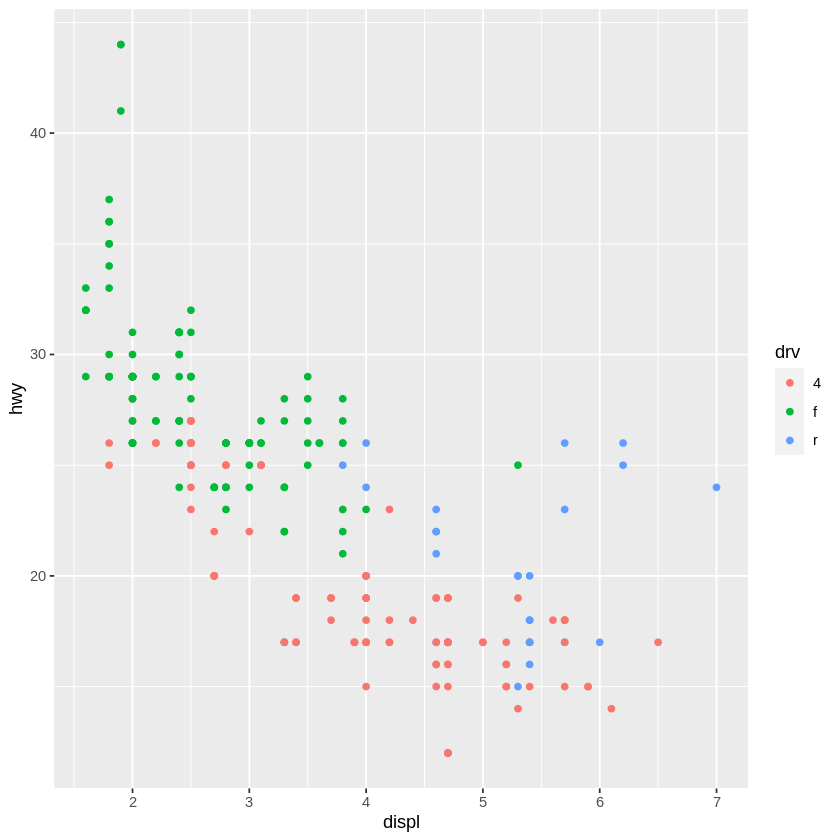

In [ ]:
qplot(displ, hwy, data = mpg, color=drv)

Pentru a adăuga diferite obiecte grafice este necesară precizarea lor prin
parametrul geom.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



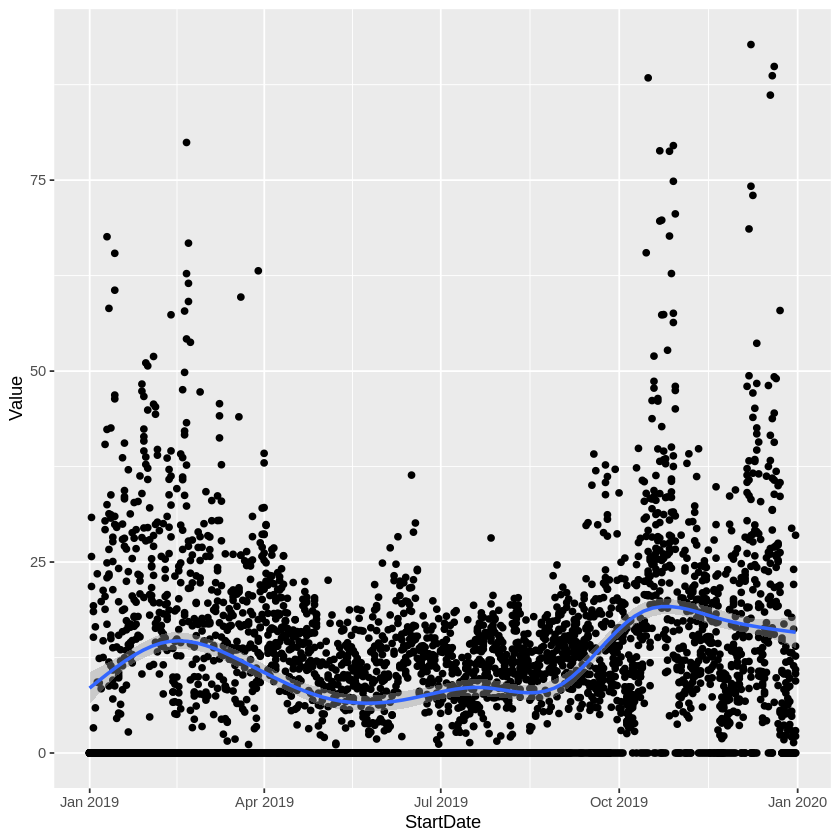

In [ ]:
qplot(StartDate, Value, data = RoData2019_PM_2_5, geom=c("point", "smooth"))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



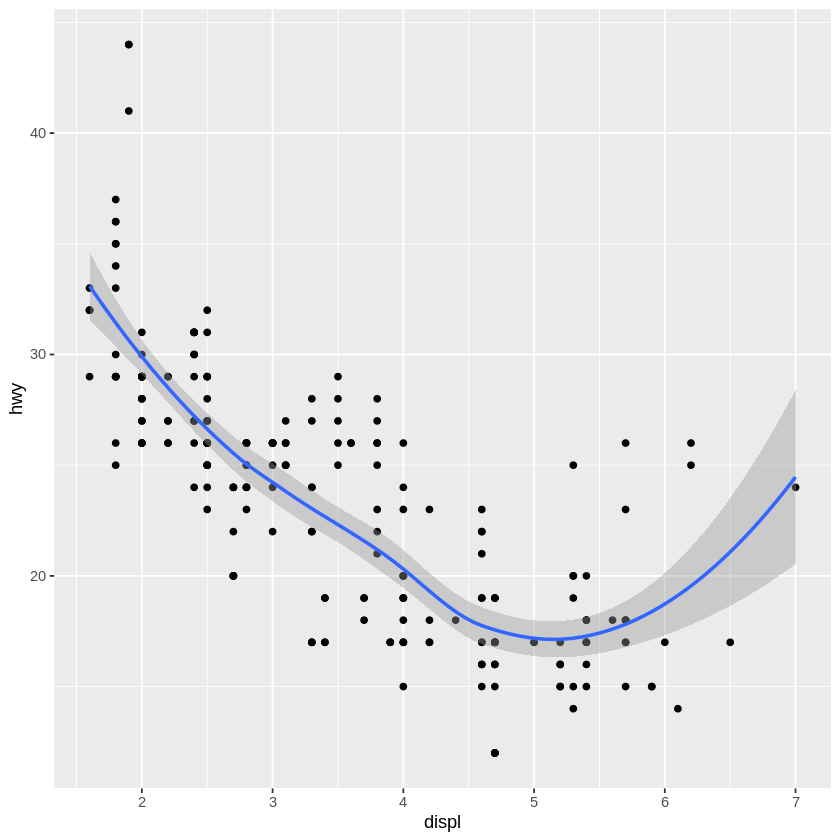

In [ ]:
qplot(displ, hwy, data = mpg, geom=c("point", "smooth"))

În caz de precizăm doar o singură axa va fi utilizată o histogramă.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



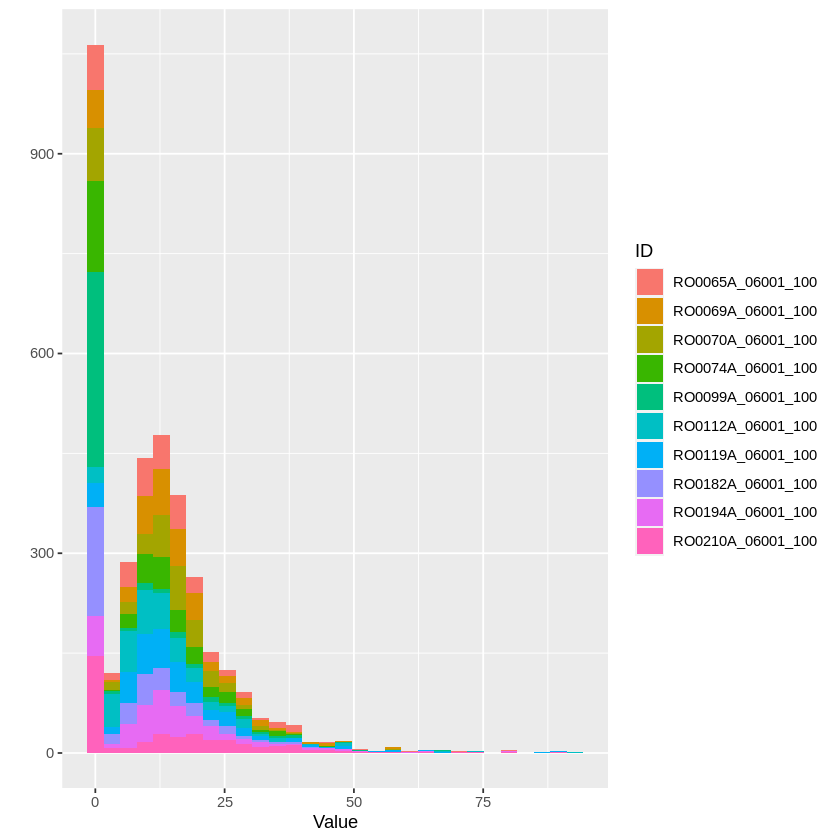

In [ ]:
qplot(Value, data = RoData2019_PM_2_5, fill = ID)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



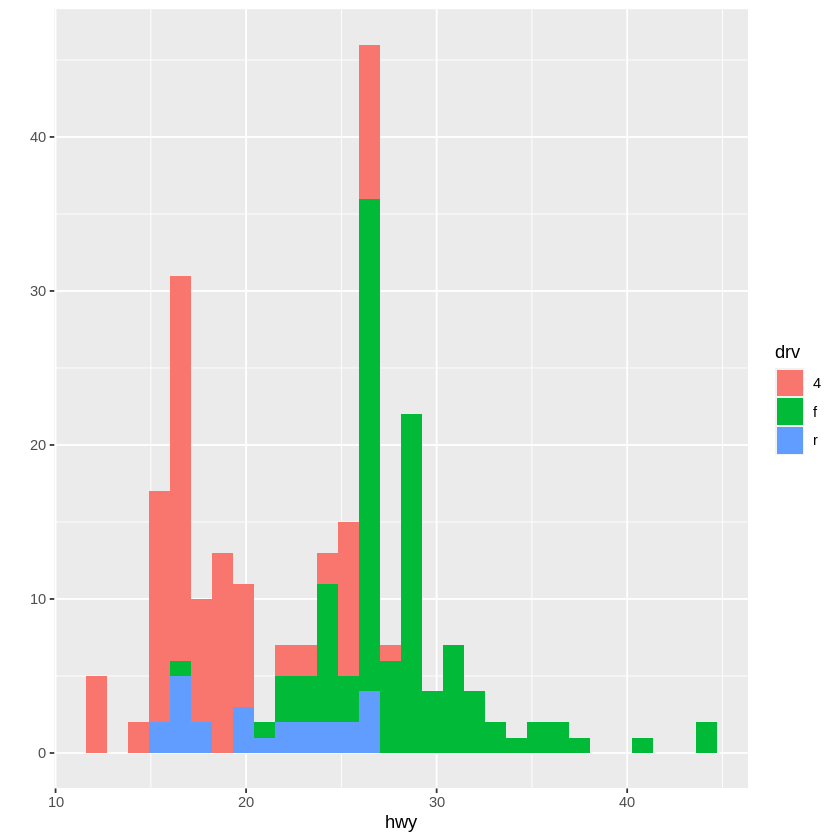

In [ ]:
qplot( hwy, data = mpg, fill=drv)

Pentru a reproduce condiționalitatea din sistemul grafic lattice se folosește
parametrul facets care primește o formulă ca valoare, dar care coneptual este
diferită de cea din sistemul lattice. În cazul de față ce se află la stânga
caracterului "~" reprezintă variabila pentru care se vor grupa datele pe
rânduri, iar ce se află la dreapta variabila pentru care se vor grupa datele
pe coloană. Caracterul "." însemnă că nu dorim o grupare pe coloană sau rând.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



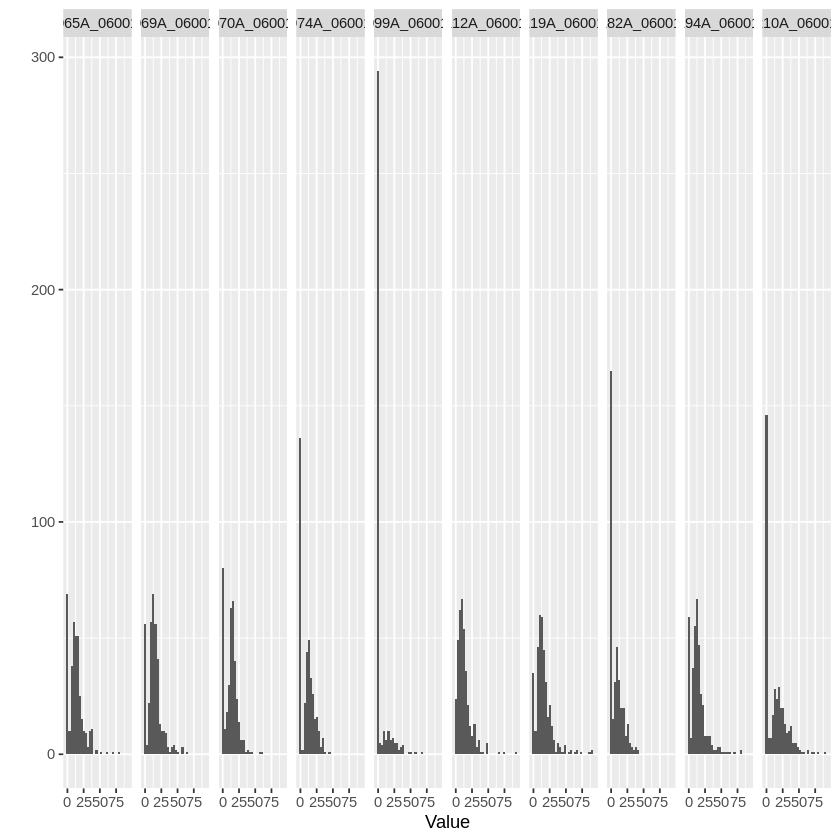

In [ ]:
qplot(Value, data = RoData2019_PM_2_5, facets = . ~ ID)

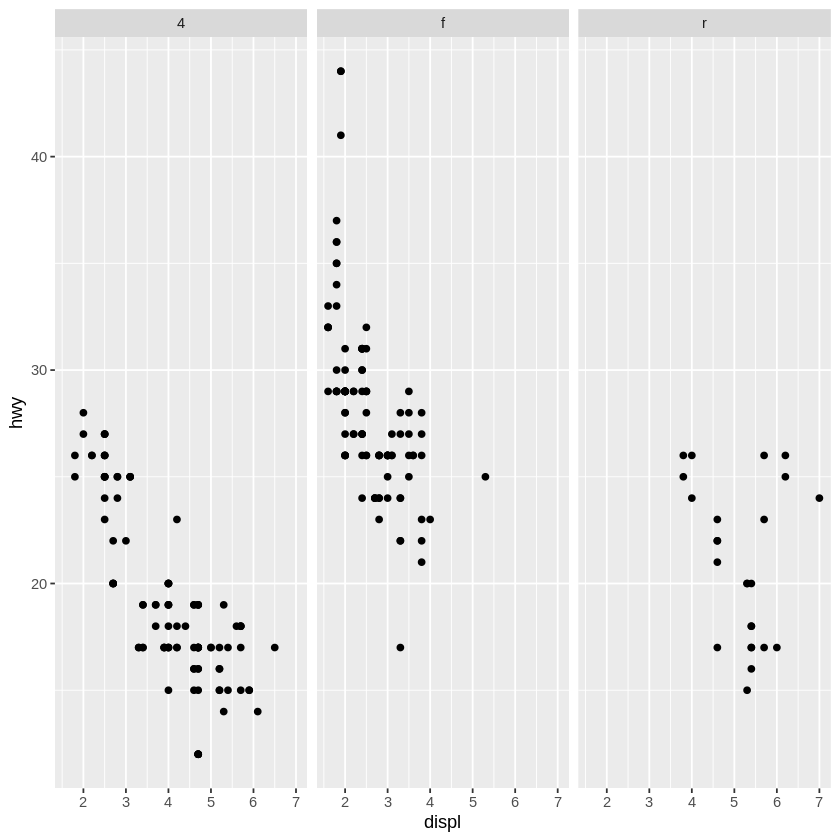

In [ ]:
qplot(displ, hwy, data = mpg, facets = . ~ drv)

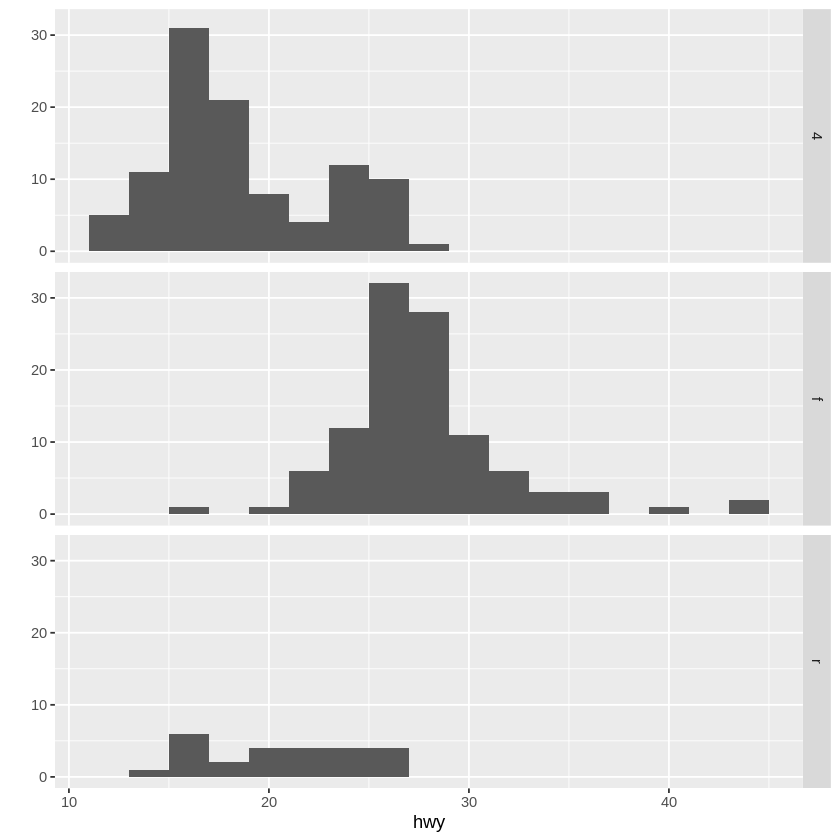

In [ ]:
qplot( hwy, data = mpg, facets = drv ~ ., binwidth = 2)

În mod implicit pentru o singură variabilă se vor folosi histograme, iar pentru
două variabile se vor folosi puncte. Putem schimba această funcționalitate
suprascriind cu ajutorul parmetrului geom.

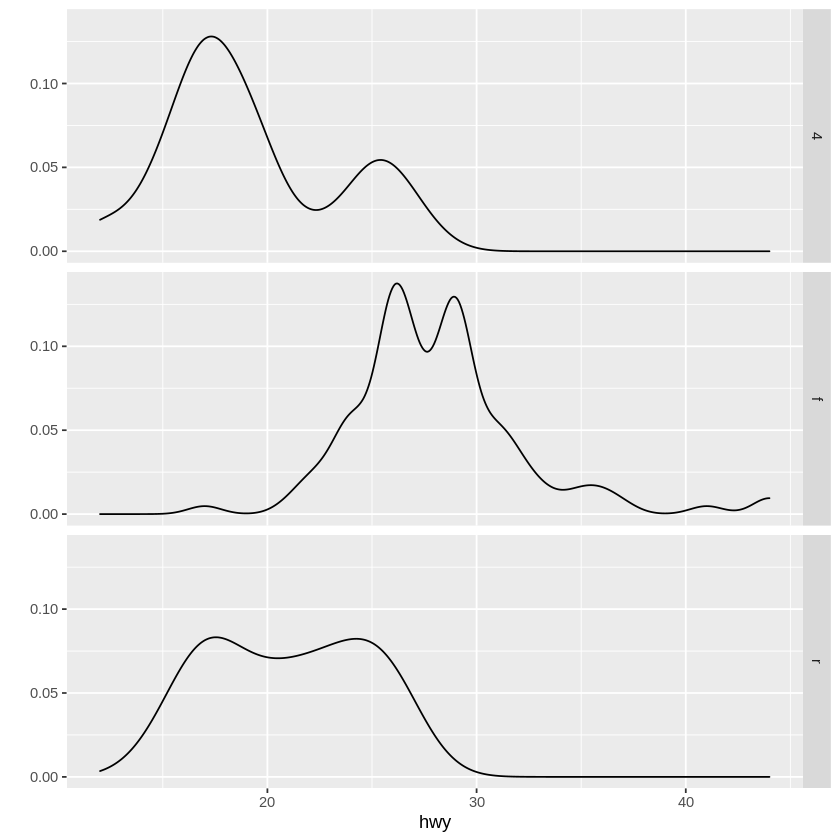

In [ ]:
qplot( hwy, data = mpg, facets = drv ~ ., geom="density")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



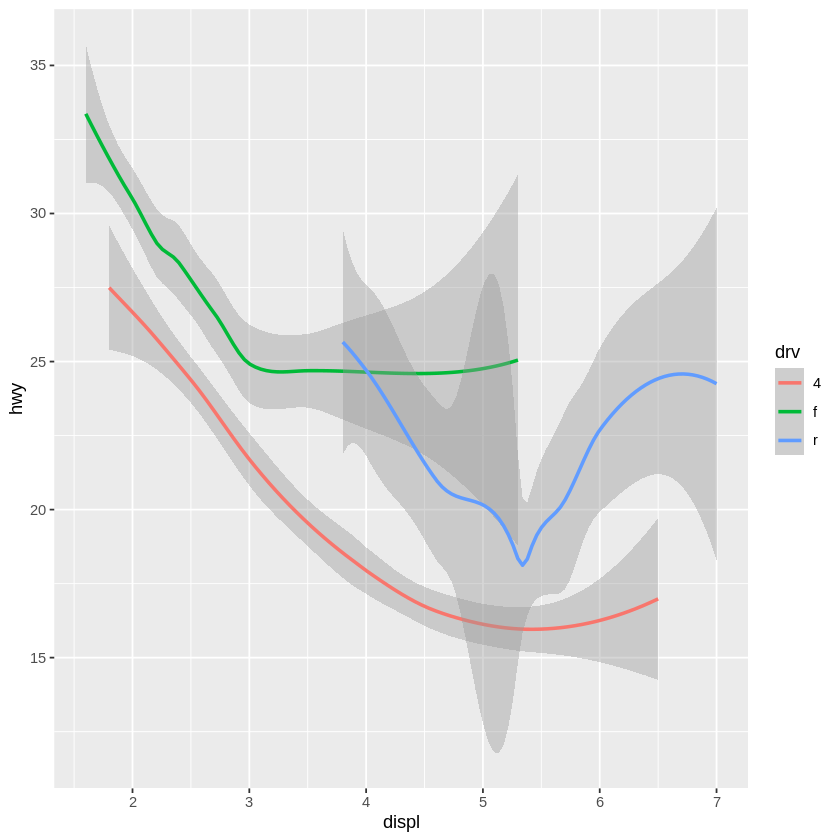

In [ ]:
qplot(displ, hwy, data = mpg, color=drv, geom="smooth")

#### ggplot

Funcția ggplot inițializează un obiect cu datele date ca argument și opțional
putem adăuga atribute precum valoriile pe axe, dimensiunea, culoarea sau grupări
de date.

In [ ]:
grafic_ro_pm_2_5 <- ggplot(RoData2019_PM_2_5, aes(x = StartDate, y = Value))

Pentru afiașare trebuie să folosim un geom grafic.

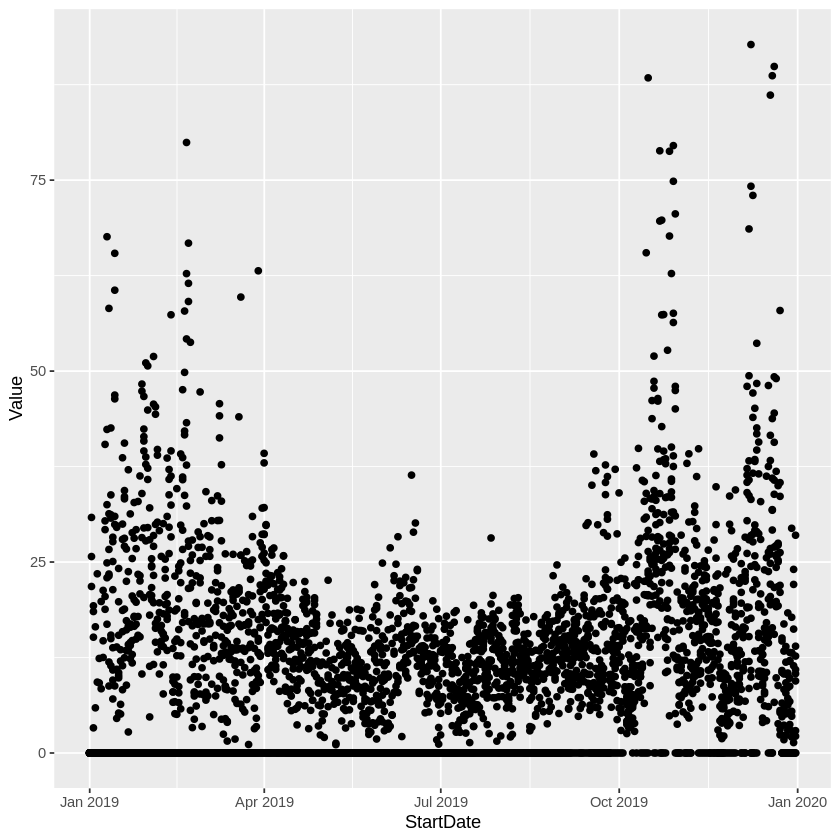

In [ ]:
grafic_ro_pm_2_5 + geom_point()

Putem adăuga mai multe funcții geom și putem reține statusul curent al graficului.

`geom_smooth()` using formula 'y ~ x'



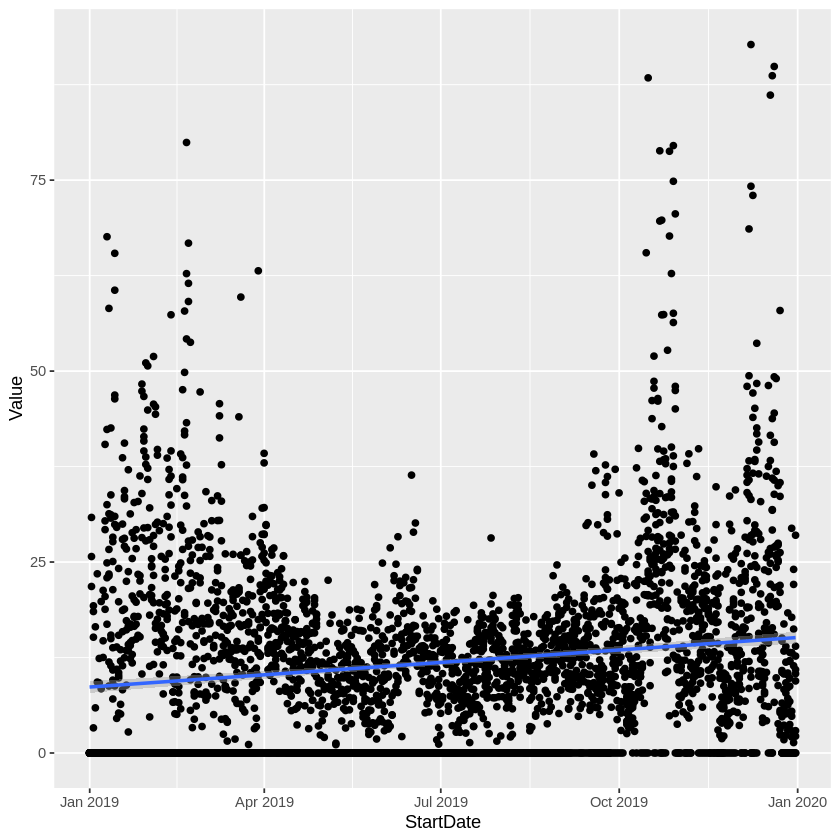

In [ ]:
grafic_ro_pm_2_5_points <- grafic_ro_pm_2_5 + geom_point()
grafic_ro_pm_2_5_points + geom_smooth(method = "lm")

Putem grupa datele cu facet_grid folosind același tip de formule ca la qplot.

`geom_smooth()` using formula 'y ~ x'



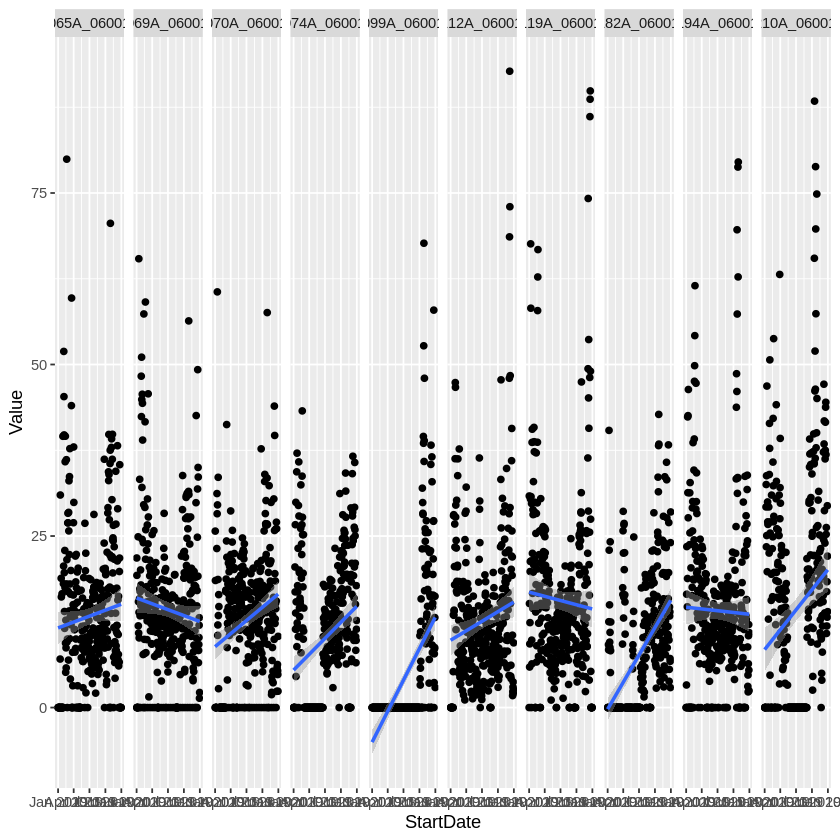

In [ ]:
grafic_ro_pm_2_5_points + facet_grid(. ~  ID) + geom_smooth(method = "lm")

Sunt două tipuri de parametri care pot fi dați funcților: prin funcția aes sau direct.
Cele date cu aes sunt legate strâns de date. Celalte sunt  constante
globale care afectează obiectele grafice.

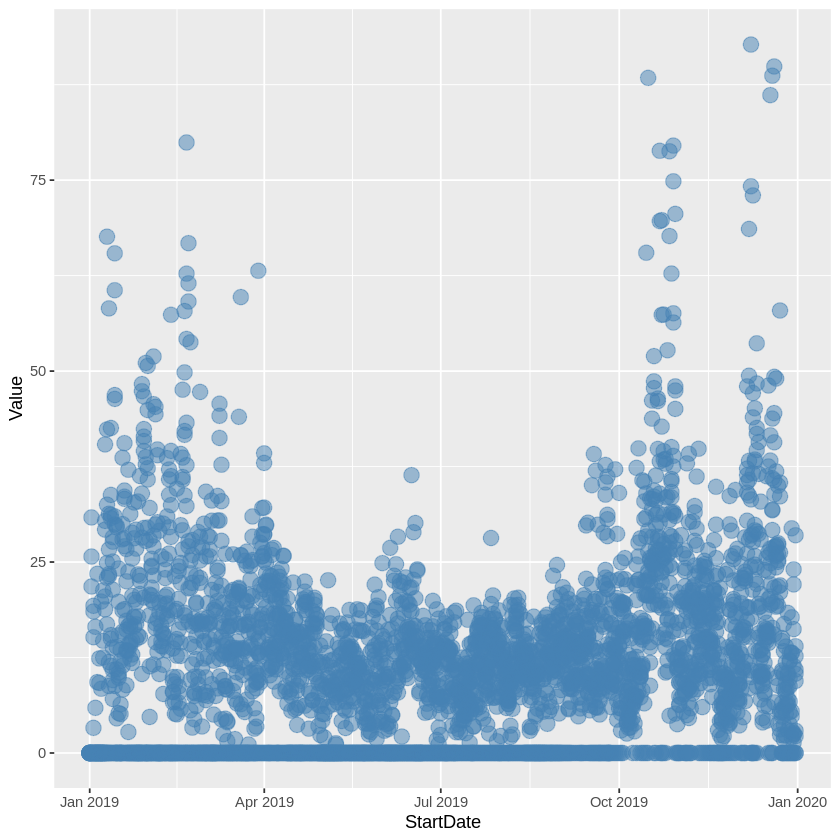

In [ ]:
grafic_ro_pm_2_5 + geom_point(color = "steelblue", alpha = 1/2, size = 4)

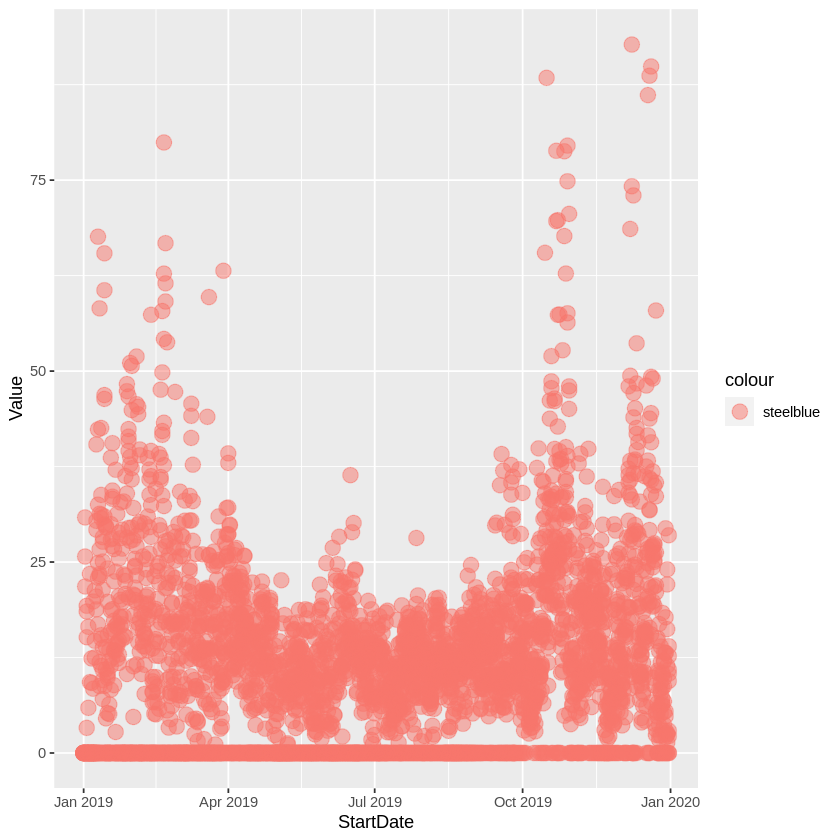

In [ ]:
grafic_ro_pm_2_5 + geom_point(aes(color = "steelblue"), alpha = 1/2, size = 4)

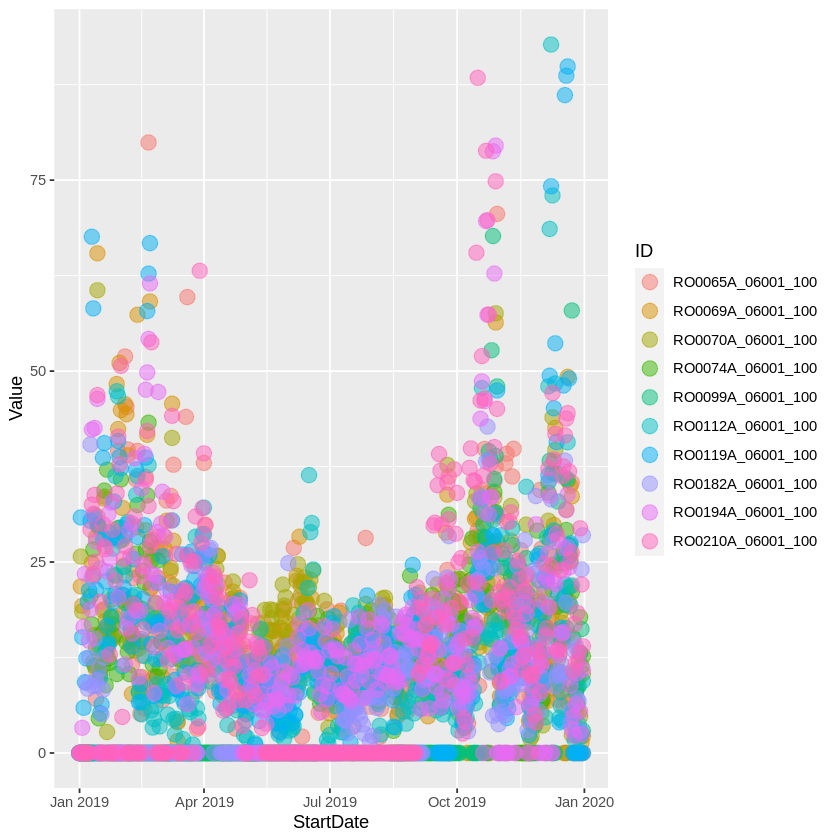

In [ ]:
grafic_ro_pm_2_5 + geom_point(aes(color = ID), alpha = 1/2, size = 4)

Trecem la ultima compenentă ggplot: sistemul de coordoante.
Putem adăuga titluri, denumiri pentru axe, legende, schimba fontul, paleta
de culori, culorea de fundal, limitele.

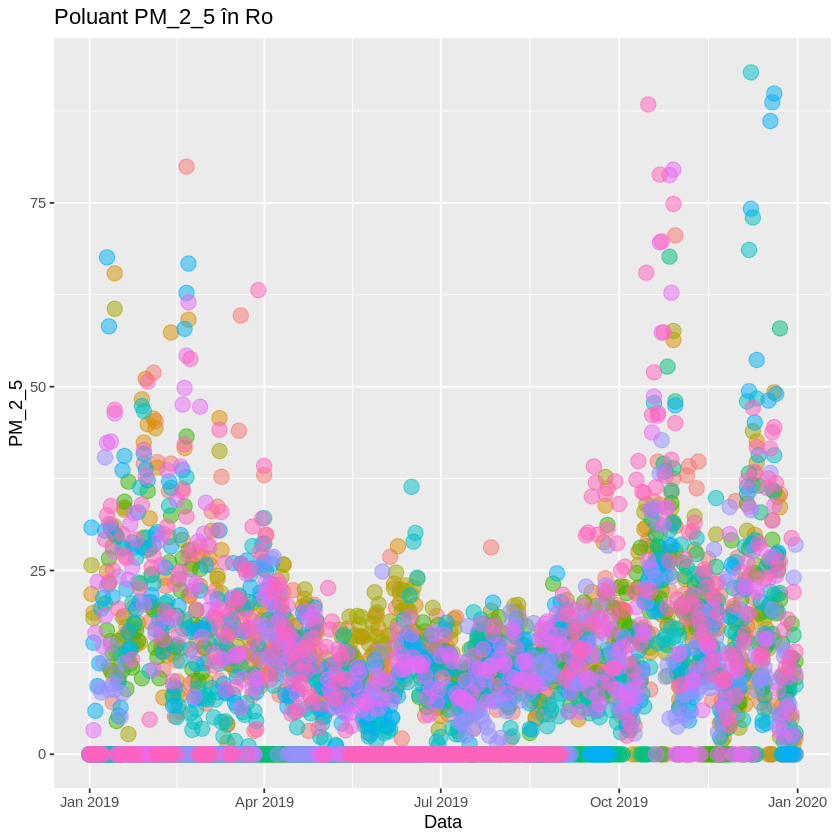

In [ ]:
grafic_ro_pm_2_5 + geom_point(aes(color = ID), alpha = 1/2, size = 4) + labs(x = "Data", y = "PM_2_5", title = "Poluant PM_2_5 în Ro") + theme(legend.position = "none")

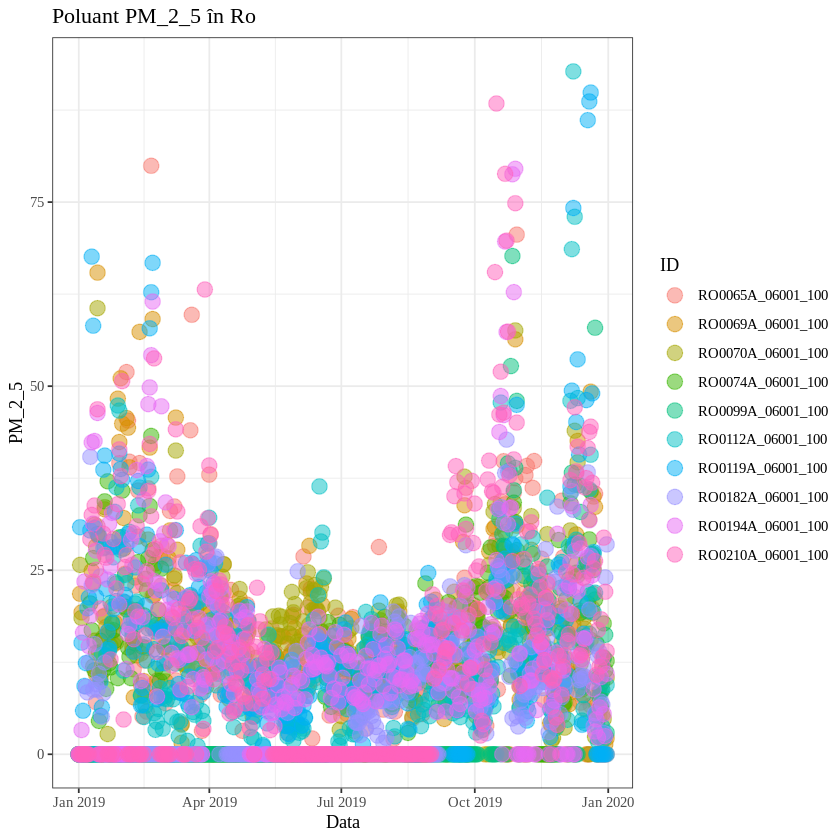

In [ ]:
grafic_ro_pm_2_5 + geom_point(aes(color = ID), alpha = 1/2, size = 4) + labs(x = "Data", y = "PM_2_5", title = "Poluant PM_2_5 în Ro") + theme_bw(base_family = "Times")

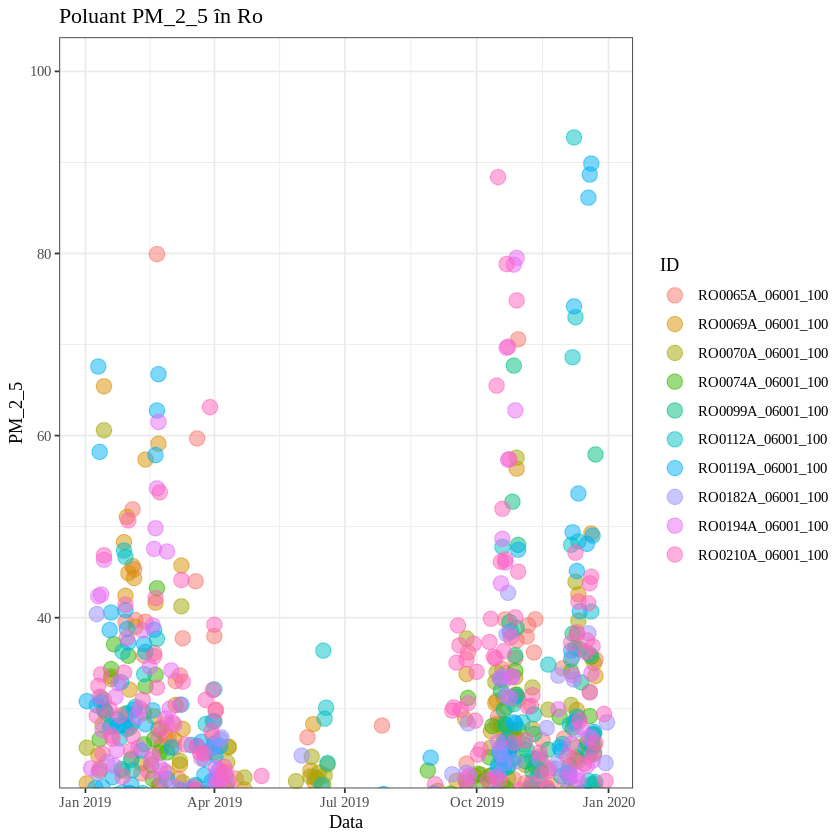

In [ ]:
grafic_ro_pm_2_5 + geom_point(aes(color = ID), alpha = 1/2, size = 4) + labs(x = "Data", y = "PM_2_5", title = "Poluant PM_2_5 în Ro") + theme_bw(base_family = "Times") + coord_cartesian(ylim = c(25,100))

#### Palete de culori

Legat de componenta scale a ggplot2 aceasta aduce funcționalitatea schimbării
paletei de culori. Paleta implicită R poate fi derutantă în majoritatea situațiilor.
În funcție de scopul graficului putem avea 3 tipuri de palete:
  - Secvențială. Pentru date continue care sunt ordonate.
  - Catitativă/Categorică. Când avem date categorice/discrete.
  - Divergentă/. Când dorim să arătăm deviația față de un punct.
  
Bibloteca RColorBrewer ne oferă mai multe palete în aceste 3 categorii. Le
putem observa cu funcția display.brewer.all().

Palete secvențiale:

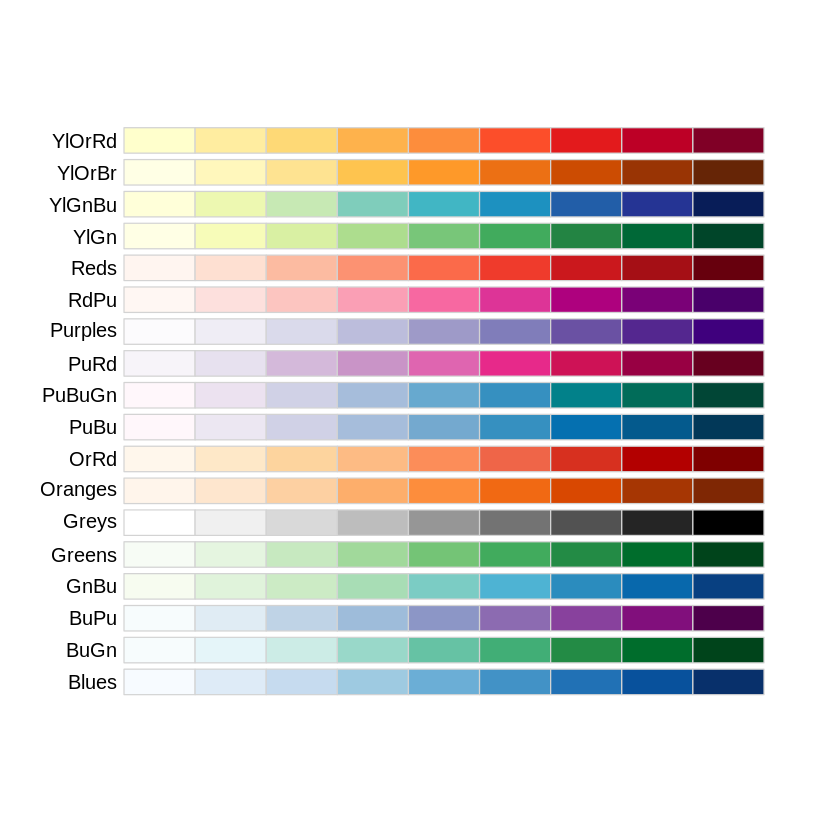

In [ ]:
display.brewer.all(type = "seq")

Palete categorice:

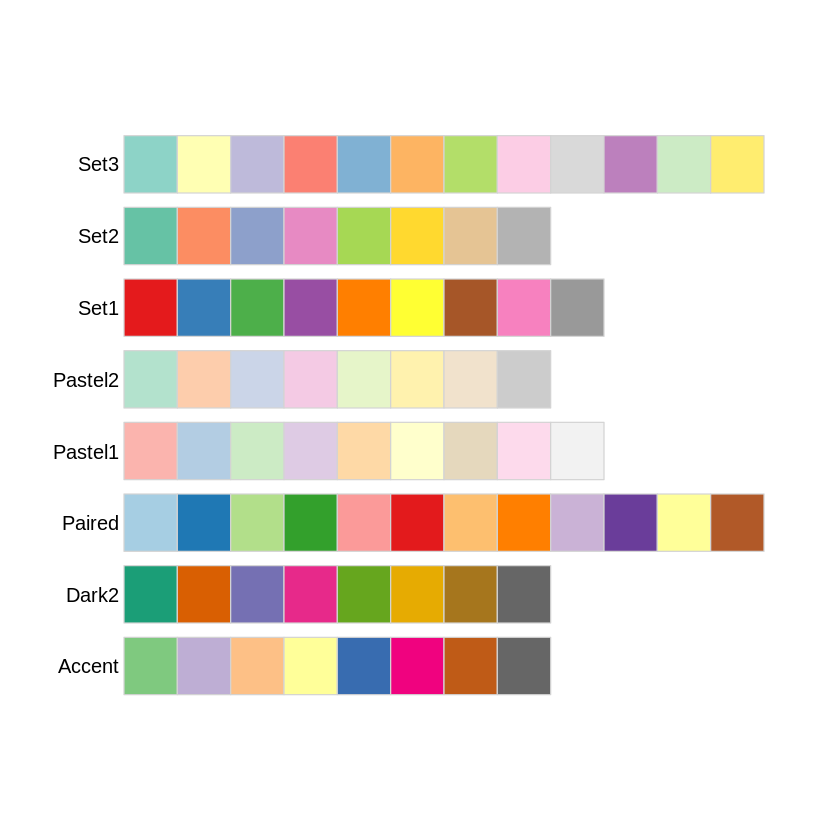

In [ ]:
display.brewer.all(type = "qual")

Palete divergente:

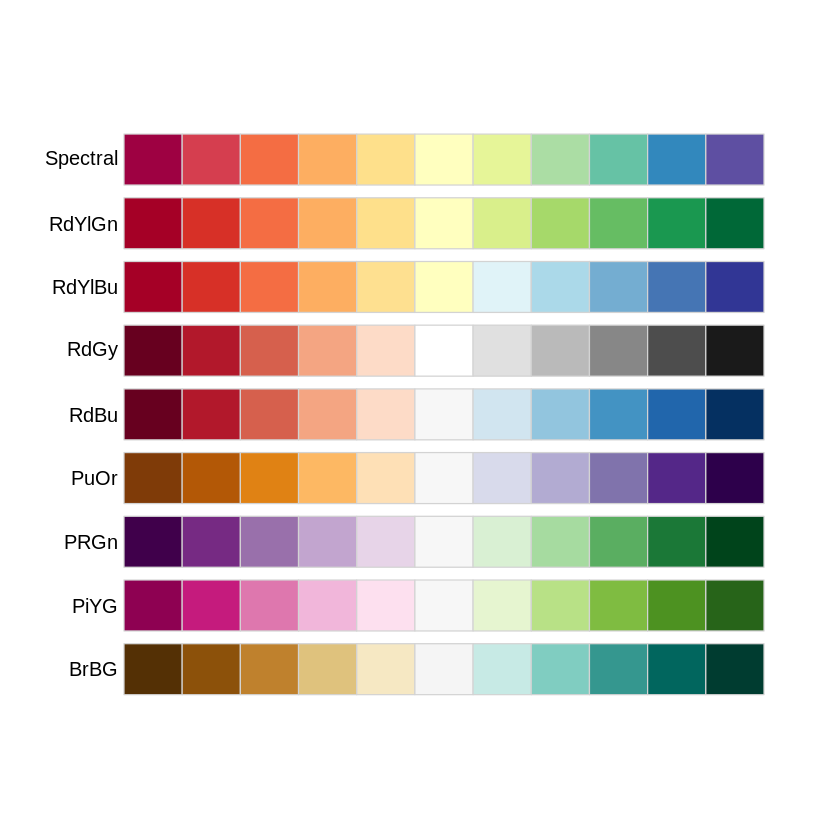

In [ ]:
display.brewer.all(type = "div")

În funcție de tipul de grafic pe care îl avem putem alege paleată pentru colorarea
punctelor sau liniilor folosind funcția scale_color_brewer(palette="X") sau pentru
umplerea compentelor în cazul histogramelor, boxplot-urilor folosinf 
scale_fill_brewer(palette="X").

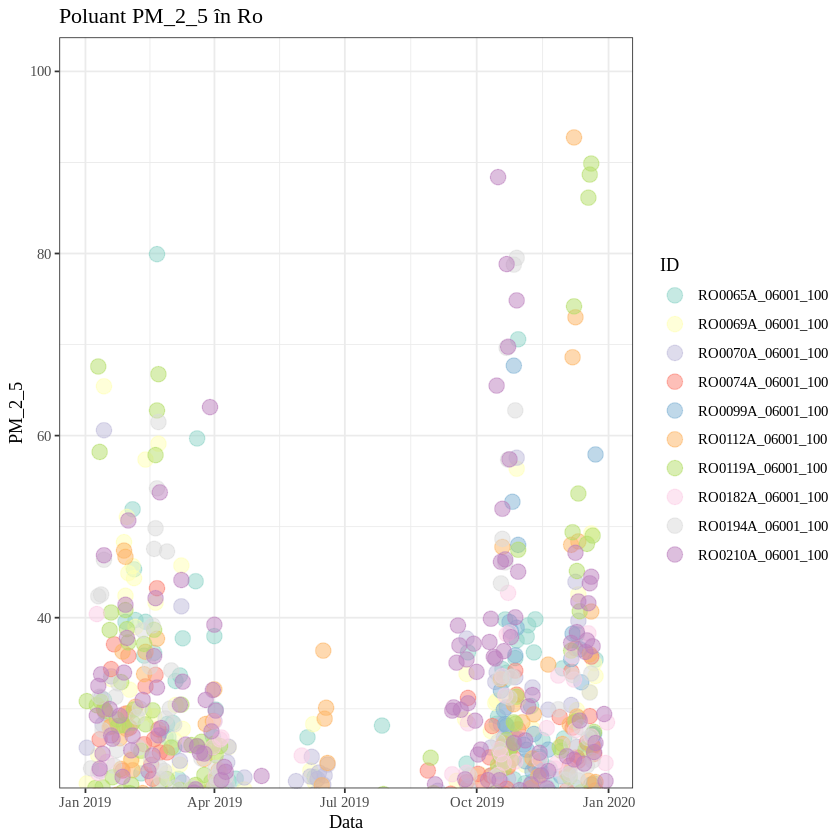

In [ ]:
ggplot(roPM_2_5, aes(x = StartDate, y = Value)) + geom_point(aes(color = ID), alpha = 1/2, size = 4) + labs(x = "Data", y = "PM_2_5", title = "Poluant PM_2_5 în Ro") + theme_bw(base_family = "Times") + coord_cartesian(ylim = c(25,100)) + scale_color_brewer(palette="Set3")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



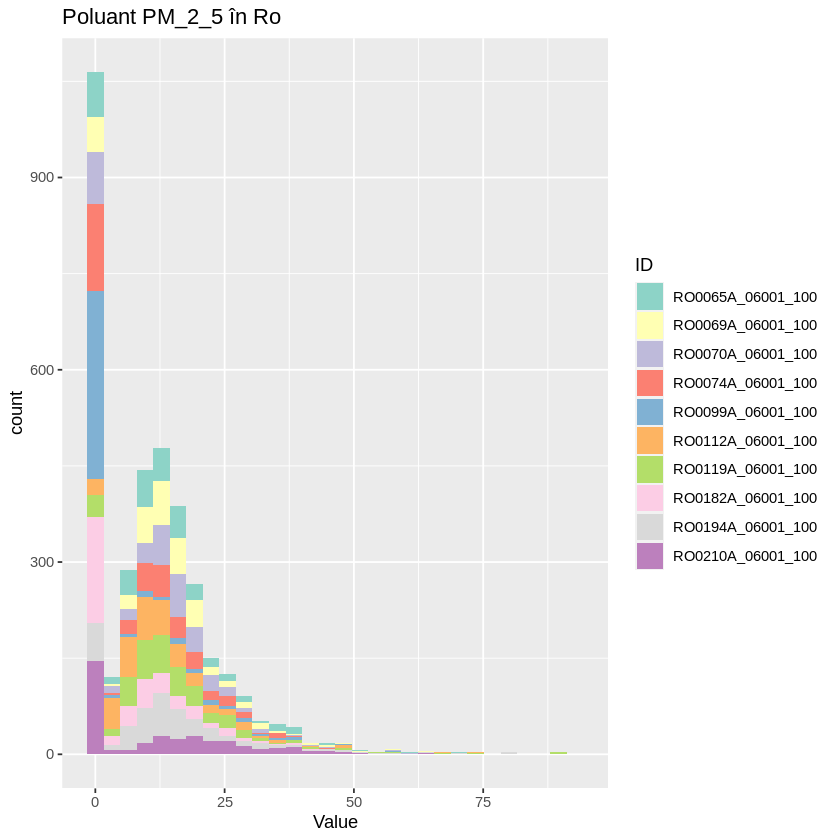

In [ ]:
ggplot(roPM_2_5, aes(x = Value, group=ID)) + geom_histogram(aes(fill = ID)) + labs(title = "Poluant PM_2_5 în Ro")  +  scale_fill_brewer(palette="Set3")

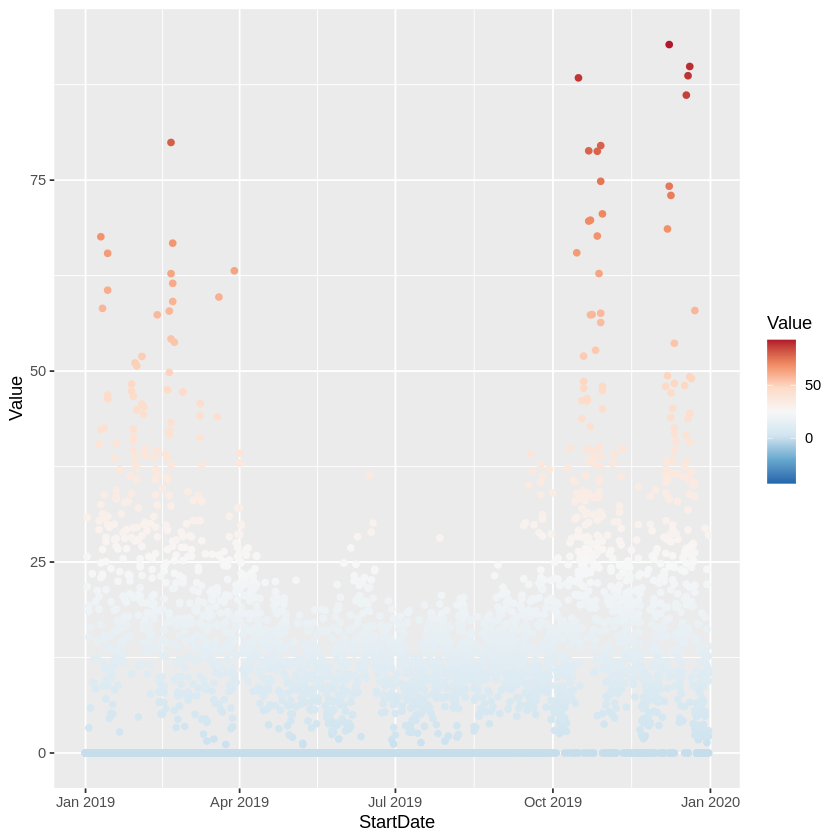

In [ ]:
ggplot(roPM_2_5, aes(x = StartDate, y = Value)) + geom_point(aes(color=Value)) +  scale_color_distiller(palette="RdBu", limits = c(50-max(abs(roPM_2_5$Value)),max(abs(roPM_2_5$Value))))

Un alt concept de luat în calcul este vizionarea graficului în alb-negru (cum
vor apărea punctele în momentul imprimării incolor). Acest lucru se poate face cu ajutor
funcțiilor scale_color_grey și scale_fill_grey. Este recomandat să oferim o valoare
mai mică de unu (valoarea implicită) pentru parametrul end pentru a nu avea puncte albe.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



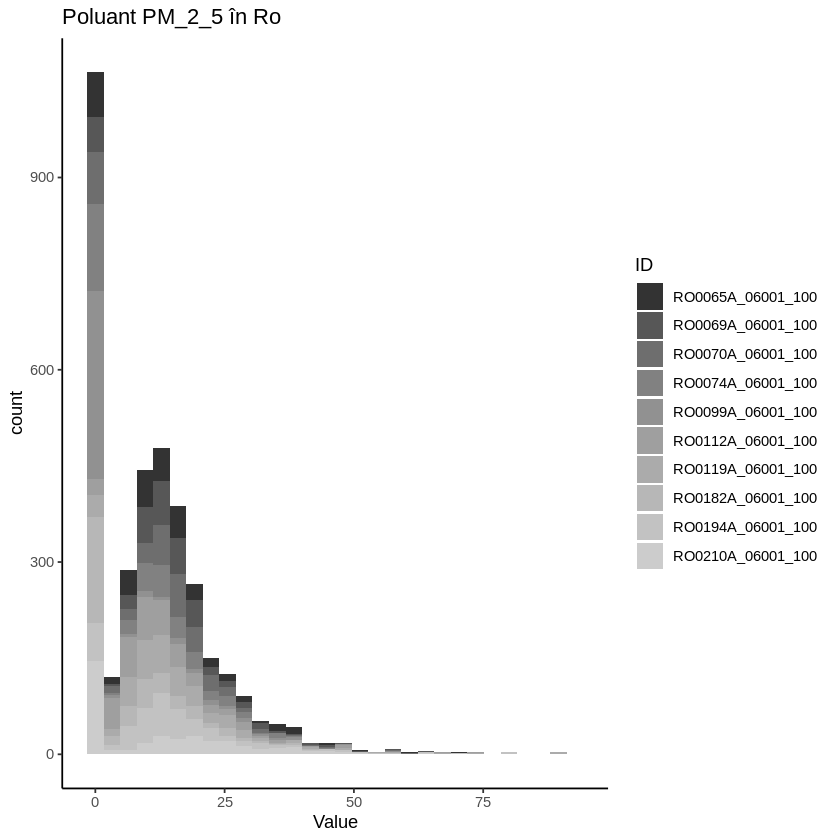

In [ ]:
ggplot(roPM_2_5, aes(x = Value, group=ID)) + geom_histogram(aes(fill = ID)) + labs(title = "Poluant PM_2_5 în Ro")  + scale_fill_grey(start=0.2, end=0.8) + theme_classic()

## Exerciții

Vom folosi datele despre valoarea poluanțiilor din România în intervalul
2013-2019.

In [ ]:
RoPollutionFilePath <- file.path("data", "poluare2019.csv")
RoPollutionData2019 <- read.csv(RoPollutionFilePath)
RoPollutionData2019$X <- NULL
colnames(RoPollutionData2019)[1] <- "StartDate"
colnames(RoPollutionData2019)[2] <- "EndDate"
colnames(RoPollutionData2019)[3] <- "Value"
colnames(RoPollutionData2019)[4] <- "Validity"
colnames(RoPollutionData2019)[5] <- "Verfication"
colnames(RoPollutionData2019)[6] <- "ID"
colnames(RoPollutionData2019)[7] <- "PolluantCode"
RoPollutionData2019$StartDate <- ymd_hms(RoPollutionData2019$StartDate)
RoPollutionData2019$ID <- factor(RoPollutionData2019$ID)
RoPollutionData2019$PolluantCode <- factor(RoPollutionData2019$PolluantCode)
RoPollutionData2019$Value <-as.numeric(RoPollutionData2019$Value)
head(RoPollutionData2019)

StartDate           EndDate             Value Validity Verfication
1 2018-12-31 22:00:00 2018-12-31 23:00:00 0.00  1        -1         
2 2018-12-31 23:00:00 2019-01-01 00:00:00 7.29  1         1         
3 2019-01-01 00:00:00 2019-01-01 01:00:00 6.90  1         1         
4 2019-01-01 01:00:00 2019-01-01 02:00:00 7.02  1         1         
5 2019-01-01 02:00:00 2019-01-01 03:00:00 7.08  1         1         
6 2019-01-01 03:00:00 2019-01-01 04:00:00 6.93  1         1         
  ID                PolluantCode
1 RO0066A_00001_100 1           
2 RO0066A_00001_100 1           
3 RO0066A_00001_100 1           
4 RO0066A_00001_100 1           
5 RO0066A_00001_100 1           
6 RO0066A_00001_100 1

In [ ]:
roMetadataFilePath <- file.path("data", "rometadata.csv")
roMetadata <- read.csv(roMetadataFilePath, header = TRUE)
head(roMetadata)

X ID                Longitude Latitude Altitude AirQualityStationType
1 1 RO0008R_00001_100 25.13484  47.32469 908      background           
2 2 RO0008R_00005_100 25.13484  47.32469 908      background           
3 3 RO0008R_00007_100 25.13484  47.32469 908      background           
4 4 RO0008R_00008_100 25.13484  47.32469 908      background           
5 5 RO0008R_00009_100 25.13484  47.32469 908      background           
6 6 RO0008R_00010_100 25.13484  47.32469 908      background           
  AirQualityStationArea AirQualityStationNatCode
1 rural-remote          RO-EM-3                 
2 rural-remote          RO-EM-3                 
3 rural-remote          RO-EM-3                 
4 rural-remote          RO-EM-3                 
5 rural-remote          RO-EM-3                 
6 rural-remote          RO-EM-3

### 1

Cum sunt distribuite valoriile pentru dioxid de azot în anul 2019 ?
[http://dd.eionet.europa.eu/vocabulary/aq/pollutant]


Warning message in log(RoData2019_NO_2$Value):
“NaNs produced”
Warning message in bplt(at[i], wid = width[i], stats = z$stats[, i], out = z$out[z$group == :
“Outlier (-Inf) in boxplot 1 is not drawn”


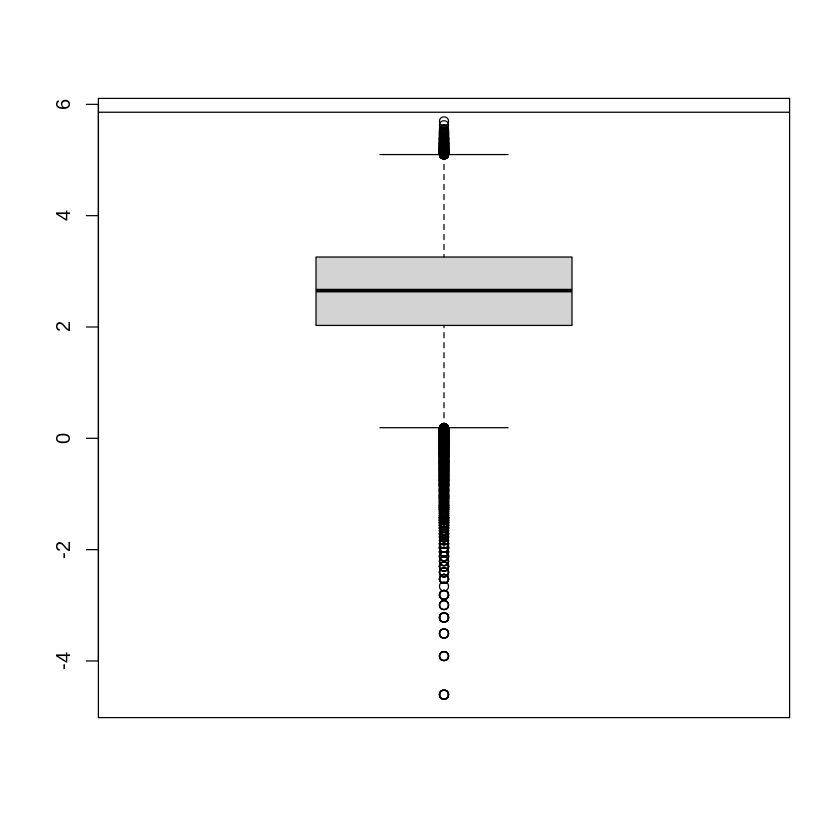

In [ ]:
RoData2019_NO_2 <- RoPollutionData2019 %>% filter(PolluantCode==8)
boxplot(log(RoData2019_NO_2$Value))
abline(h = log(350))

In [ ]:
summary(RoPollutionData2019[RoPollutionData2019$PolluantCode==8, "Value"])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -3.47    7.60   14.21   19.75   25.96  297.25 

### 2

Care este stația cu cele mai mari valori pentru dioxid de azot ?


In [ ]:
head(RoData2019_NO_2)

StartDate           EndDate             Value Validity Verfication
1 2018-12-31 22:00:00 2018-12-31 23:00:00  0.00 1        -1         
2 2018-12-31 23:00:00 2019-01-01 00:00:00 22.72 1         1         
3 2019-01-01 00:00:00 2019-01-01 01:00:00 20.55 1         1         
4 2019-01-01 01:00:00 2019-01-01 02:00:00 16.72 1         1         
5 2019-01-01 02:00:00 2019-01-01 03:00:00 16.61 1         1         
6 2019-01-01 03:00:00 2019-01-01 04:00:00  0.00 1        -1         
  ID                PolluantCode
1 RO0066A_00008_100 8           
2 RO0066A_00008_100 8           
3 RO0066A_00008_100 8           
4 RO0066A_00008_100 8           
5 RO0066A_00008_100 8           
6 RO0066A_00008_100 8

In [ ]:
df <- RoData2019_NO_2 %>% group_by(ID) %>% summarise(total=sum(Value))
# df

In [ ]:
df[which.max(df$total),]

ID                total   
1 RO0073A_00008_100 449646.7

### 3

Respectă România reccomandările uniunii europene pentru dioxid de azot ?
[ https://ec.europa.eu/environment/air/quality/standards.htm ]



In [ ]:
sum(RoData2019_NO_2$Value > 200) <= 18

[1] FALSE

### 4

Există vreo evoluție a României din anul 2013 până în anul 2019 pentru poluantul
dioxid de azot ?


Warning message in log(RoData2013_NO_2$Value):
“NaNs produced”
Warning message in log(RoData2019_NO_2$Value):
“NaNs produced”
Warning message in bplt(at[i], wid = width[i], stats = z$stats[, i], out = z$out[z$group == :
“Outlier (-Inf) in boxplot 1 is not drawn”
Warning message in bplt(at[i], wid = width[i], stats = z$stats[, i], out = z$out[z$group == :
“Outlier (-Inf) in boxplot 2 is not drawn”


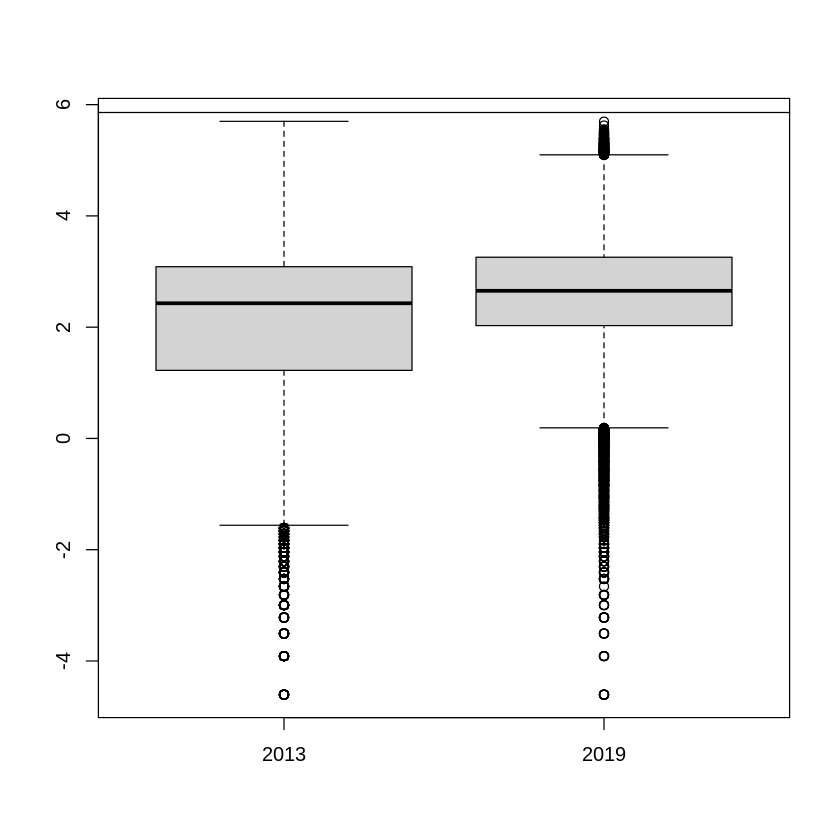

In [ ]:
RoData2013_NO_2<- RoPollutionData2013 %>% filter(PolluantCode==8)
boxplot(log(RoData2013_NO_2$Value), log(RoData2019_NO_2$Value), names=c("2013", "2019") )
abline(h = log(350))

In [ ]:
value_2013 <- sum(RoData2013_NO_2$Value > 200)
print(value_2013)
value_2019 <- sum(RoData2019_NO_2$Value > 200)
print(value_2019)
print(value_2013 > value_2019)

[1] 16
[1] 66
[1] FALSE



### 5

Există luni în timpul anului 2019 care au valori ridicate pentru dioxid de azot ?


In [ ]:
RoData2019_NO_2_months <- RoData2019_NO_2 %>% group_by(month=floor_date(StartDate, "month")) %>% summarise(total=mean(Value)) %>% arrange(desc(total), .by_group = TRUE)
head(RoData2019_NO_2_months)

`summarise()` ungrouping output (override with `.groups` argument)



month      total   
1 2019-12-01 24.58932
2 2019-01-01 24.40676
3 2019-02-01 24.14507
4 2019-10-01 23.66614
5 2019-11-01 21.28867
6 2019-03-01 21.24094


### 6

Ce valoare are cuantila de 90% pentru dioxid de azot pe anul 2019 ?


In [ ]:
quantile(RoData2019_NO_2$Value, 0.9)

90% 
44.2


### 7 

Câte stații de dioxid de azot are România ?

In [ ]:
df <- unique(RoData2019_NO_2$ID)
length(df)

[1] 98